In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

/home/ujjawal/project/env1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X_train=h5py.File("/home/ujjawal/project/env1/ImageNetData/train/train_data.h5","r")
Y_train=h5py.File("/home/ujjawal/project/env1/ImageNetData/train/Y_train.h5",'r')
X_val=h5py.File("/home/ujjawal/project/env1/ImageNetData/val/val_data.h5",'r')
Y_val=h5py.File("/home/ujjawal/project/env1/ImageNetData/val/Y_test.h5",'r')


In [3]:
list(X_train.keys()),list(Y_train.keys()),list(X_val.keys()),list(Y_val.keys())

(['train_data'], ['Y_train'], ['val_data'], ['Y_test'])

In [4]:
print(X_train['train_data'].shape)
print(Y_train['Y_train'].shape)
print(X_val['val_data'].shape)
print(Y_val['Y_test'].shape)

(1281167, 224, 224, 3)
(1281167, 1000)
(50000, 224, 224, 3)
(50000, 1000)


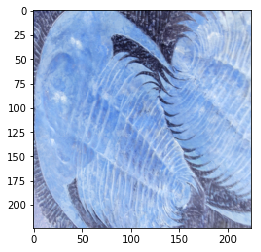

In [5]:
plt.imshow(X_train['train_data'][0])

In [6]:
X_train,y_train,X_test,y_test=X_train['train_data'],Y_train['Y_train'],X_val['val_data'],Y_val['Y_test']

In [7]:
def create_placeholders(H,W,C,Y0):
    X=tf.placeholder(tf.float32,shape=(None,H,W,C))
    Y=tf.placeholder(tf.float32,shape=(None,Y0))
    return X,Y
    

In [8]:
def initialize_parameters():
    tf.set_random_seed(1) 
    W1= tf.get_variable("W1", [3,3,3,32], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2= tf.get_variable("W2", [3,3,32,64], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W3= tf.get_variable("W3", [3,3,64,128], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W4= tf.get_variable("W4", [1,1,128,64], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W5= tf.get_variable("W5", [3,3,64,128], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W6= tf.get_variable("W6", [3,3,128,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W7= tf.get_variable("W7", [1,1,256,128], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W8= tf.get_variable("W8", [3,3,128,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W9= tf.get_variable("W9", [3,3,256,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W10= tf.get_variable("W10", [1,1,512,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W11= tf.get_variable("W11", [3,3,256,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W12= tf.get_variable("W12", [1,1,512,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W13= tf.get_variable("W13", [3,3,256,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W14= tf.get_variable("W14", [3,3,512,1024], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W15= tf.get_variable("W15", [1,1,1024,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W16= tf.get_variable("W16", [3,3,512,1024], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W17 = tf.get_variable("W17", [1,1,1024,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W18= tf.get_variable("W18", [3,3,512,1024], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W19= tf.get_variable("W19", [1,1,1024,1000], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    #W_1=tf.Variable(tf.constant(0.1,shape=[3,3,o_d,n_f]))
    #W_3=tf.Variable(tf.constant(0.1,shape=[1,1,o_d,n_f]))
    B1= tf.Variable(tf.constant(0.01, shape = [32]), "B1")
    B2= tf.Variable(tf.constant(0.01, shape = [64]), "B2")
    B3= tf.Variable(tf.constant(0.01, shape = [128]), "B3")
    B4= tf.Variable(tf.constant(0.01, shape = [64]), "B4")
    B5= tf.Variable(tf.constant(0.01, shape = [128]), "B5")
    B6= tf.Variable(tf.constant(0.01, shape = [256]), "B6")
    B7= tf.Variable(tf.constant(0.01, shape = [128]), "B7")
    B8= tf.Variable(tf.constant(0.01, shape = [256]), "B8")
    B9= tf.Variable(tf.constant(0.01, shape = [512]), "B9")
    B10= tf.Variable(tf.constant(0.01, shape = [256]), "B10")
    B11= tf.Variable(tf.constant(0.01, shape = [512]), "B11")
    B12= tf.Variable(tf.constant(0.01, shape = [256]), "B12")
    B13= tf.Variable(tf.constant(0.01, shape = [512]), "B13")
    B14= tf.Variable(tf.constant(0.01, shape = [1024]), "B14")
    B15= tf.Variable(tf.constant(0.01, shape = [512]), "B15")
    B16= tf.Variable(tf.constant(0.01, shape = [1024]), "B16")
    B17 = tf.Variable(tf.constant(0.01, shape = [512]), "B17")
    B18= tf.Variable(tf.constant(0.01, shape = [1024]), "B18")
    B19= tf.Variable(tf.constant(0.01, shape = [1000]), "B19")
    parameters = {"W1": W1,"W2": W2,"W3": W3,"W4": W4,"W5": W5,"W6": W6,"W7": W7,"W8": W8,"W9": W9,"W10": W10,
                  "W11": W11,"W12": W12,"W13": W13,"W14": W14,"W15": W15,"W16": W16,"W17": W17,"W18": W18,
                  "W19": W19, "B1": B1,"B2": B2,"B3": B3,"B4": B4,"B5": B5,"B6": B6,"B7": B7,"B8": B8,"B9": B9,"B10": B10,
                  "B11": B11,"B12": B12,"B13": B13,"B14": B14,"B15": B15,"B16": B16,"B17": B17,"B18": B18,
                  "B19": B19}
    return parameters

In [9]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    W6 = parameters['W6']
    W7 = parameters['W7']
    W8 = parameters['W8']
    W9 = parameters['W9']
    W10 = parameters['W10']
    W11 = parameters['W11']
    W12= parameters['W12']
    W13 = parameters['W13']
    W14= parameters['W14']
    W15 = parameters['W15']
    W16 = parameters['W16']
    W17= parameters['W17']
    W18= parameters['W18']
    W19= parameters['W19']
    B1 = parameters['B1']
    B2 = parameters['B2']
    B3 = parameters['B3']
    B4 = parameters['B4']
    B5 = parameters['B5']
    B6 = parameters['B6']
    B7 = parameters['B7']
    B8 = parameters['B8']
    B9 = parameters['B9']
    B10 = parameters['B10']
    B11 = parameters['B11']
    B12= parameters['B12']
    B13 = parameters['B13']
    B14= parameters['B14']
    B15 = parameters['B15']
    B16 = parameters['B16']
    B17= parameters['B17']
    B18= parameters['B18']
    B19= parameters['B19']
    
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    Z1 = tf.nn.bias_add(Z1, B1)
    bn1= tf.contrib.layers.batch_norm(Z1,center=True,scale=True,is_training=True)
    A1 = tf.nn.leaky_relu(bn1)

    P1 = tf.nn.max_pool(A1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    Z2 = tf.nn.bias_add(Z2, B2)
    bn2= tf.contrib.layers.batch_norm(Z2,center=True,scale=True,is_training=True)
    A2 = tf.nn.leaky_relu(bn2)
    
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z3 = tf.nn.conv2d(P2,W3, strides = [1,1,1,1], padding = 'SAME')
    Z3 = tf.nn.bias_add(Z3, B3)
    bn3= tf.contrib.layers.batch_norm(Z3,center=True,scale=True,is_training=True)
    A3 = tf.nn.leaky_relu(bn3)
    
    Z4 = tf.nn.conv2d(A3,W4, strides = [1,1,1,1], padding = 'SAME')
    Z4 = tf.nn.bias_add(Z4, B4)
    bn4= tf.contrib.layers.batch_norm(Z4,center=True,scale=True,is_training=True)
    A4 = tf.nn.leaky_relu(bn4)
    
    Z5 = tf.nn.conv2d(A4,W5, strides = [1,1,1,1], padding = 'SAME')
    Z5 = tf.nn.bias_add(Z5, B5)
    bn5= tf.contrib.layers.batch_norm(Z5,center=True,scale=True,is_training=True)
    A5 = tf.nn.leaky_relu(bn5)
    
    P3 = tf.nn.max_pool(A5, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z6 = tf.nn.conv2d(P3,W6, strides = [1,1,1,1], padding = 'SAME')
    Z6 = tf.nn.bias_add(Z6, B6)
    bn6= tf.contrib.layers.batch_norm(Z6,center=True,scale=True,is_training=True)
    A6 = tf.nn.leaky_relu(bn6)
    
    Z7 = tf.nn.conv2d(A6,W7, strides = [1,1,1,1], padding = 'SAME')
    Z7 = tf.nn.bias_add(Z7, B7)
    bn7= tf.contrib.layers.batch_norm(Z7,center=True,scale=True,is_training=True)
    A7 = tf.nn.leaky_relu(bn7)
    
    Z8 = tf.nn.conv2d(A7,W8, strides = [1,1,1,1], padding = 'SAME')
    Z8 = tf.nn.bias_add(Z8, B8)
    bn8= tf.contrib.layers.batch_norm(Z8,center=True,scale=True,is_training=True)
    A8 = tf.nn.leaky_relu(bn8)
    
    
    P4 = tf.nn.max_pool(A8, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z9 = tf.nn.conv2d(P4,W9, strides = [1,1,1,1], padding = 'SAME')
    Z9 = tf.nn.bias_add(Z9, B9)
    bn9= tf.contrib.layers.batch_norm(Z9,center=True,scale=True,is_training=True)
    A9 = tf.nn.leaky_relu(bn9)
    
    Z10 = tf.nn.conv2d(A9,W10, strides = [1,1,1,1], padding = 'SAME')
    Z10 = tf.nn.bias_add(Z10, B10)
    bn10= tf.contrib.layers.batch_norm(Z10,center=True,scale=True,is_training=True)
    A10= tf.nn.leaky_relu(bn10)
    
    Z11 = tf.nn.conv2d(A10,W11, strides = [1,1,1,1], padding = 'SAME')
    Z11 = tf.nn.bias_add(Z11, B11)
    bn11= tf.contrib.layers.batch_norm(Z11,center=True,scale=True,is_training=True)
    A11 = tf.nn.leaky_relu(bn11)
    
    Z12 = tf.nn.conv2d(A11,W12, strides = [1,1,1,1], padding = 'SAME')
    Z12 = tf.nn.bias_add(Z12, B12)
    bn12= tf.contrib.layers.batch_norm(Z12,center=True,scale=True,is_training=True)
    A12 = tf.nn.leaky_relu(bn12)
    
    Z13 = tf.nn.conv2d(A12,W13, strides = [1,1,1,1], padding = 'SAME')
    Z13 = tf.nn.bias_add(Z13, B13)
    bn13= tf.contrib.layers.batch_norm(Z13,center=True,scale=True,is_training=True)
    A13 = tf.nn.leaky_relu(bn13)
    
    
    P5 = tf.nn.max_pool(A13, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z14 = tf.nn.conv2d(P5,W14, strides = [1,1,1,1], padding = 'SAME')
    Z14 = tf.nn.bias_add(Z14, B14)
    bn14= tf.contrib.layers.batch_norm(Z14,center=True,scale=True,is_training=True)
    A14 = tf.nn.leaky_relu(bn14)
    
    Z15 = tf.nn.conv2d(A14,W15, strides = [1,1,1,1], padding = 'SAME')
    Z15 = tf.nn.bias_add(Z15, B15)
    bn15= tf.contrib.layers.batch_norm(Z15,center=True,scale=True,is_training=True)
    A15 = tf.nn.leaky_relu(bn15)

    Z16 = tf.nn.conv2d(A15,W16, strides = [1,1,1,1], padding = 'SAME')
    Z16 = tf.nn.bias_add(Z16, B16)
    bn16= tf.contrib.layers.batch_norm(Z16,center=True,scale=True,is_training=True)
    A16 = tf.nn.leaky_relu(bn16)
    
    Z17 = tf.nn.conv2d(A16,W17, strides = [1,1,1,1], padding = 'SAME')
    Z17 = tf.nn.bias_add(Z17, B17)
    bn17= tf.contrib.layers.batch_norm(Z17,center=True,scale=True,is_training=True)
    A17 = tf.nn.leaky_relu(bn17)
    
    Z18 = tf.nn.conv2d(A17,W18, strides = [1,1,1,1], padding = 'SAME')
    Z18 = tf.nn.bias_add(Z18, B18)
    bn18= tf.contrib.layers.batch_norm(Z18,center=True,scale=True,is_training=True)
    A18 = tf.nn.leaky_relu(bn18)
    
    Z19 = tf.nn.conv2d(A18,W19, strides = [1,1,1,1], padding = 'SAME')
    Z19 = tf.nn.bias_add(Z19, B19)
    bn19= tf.contrib.layers.batch_norm(Z19,center=True,scale=True,is_training=True)
    A19 = tf.nn.leaky_relu(bn19)
    
    P6=tf.nn.avg_pool(A19,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    P6 = tf.contrib.layers.flatten(P6)
    
    Z20 = tf.contrib.layers.fully_connected(P6, 1000, activation_fn=None)

    return Z20

In [13]:
def compute_cost(Z20, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z20, labels = Y))
    return cost

In [14]:

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 160, minibatch_size = 64, print_cost = True):
    
    # Initializing the session
    tf.reset_default_graph() 
    tf.set_random_seed(1)
    
    seed = 3
    
    # retrieving the shapes of the X and Y tensors
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]      
    (k, n_Hv, n_Wv, n_Cv) = X_test.shape
    n_yv = Y_test.shape[1]
    
    # declaring a list to track epoch costs
    costs = []  
    
    # creating placeholders
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    
    # initializing parameters
    parameters = initialize_parameters()
    
    # Forward Propagation
    Z20 = forward_propagation(X, parameters)
    
    # Computing costs
    cost = compute_cost(Z20, Y)
    
    # Selection of optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # initializing global variables
    init = tf.global_variables_initializer()
    
    #n = 0
    #sample = 1024
    #count=0
    # Session
    with tf.Session() as sess:
        
   
        sess.run(init)
    
        # main training iterations
        for epoch in range(num_epochs): 
            print("execution of epoch no:{}".format(epoch))
            n=0
            sample=1024
            count=0
            
            # code to sample from X_train and Y_train
            while n < m:
                count +=1
                print("count:{count},no_of_sample_passed:{n}".format(count=count,n=n))
                if (m-n+1 < sample):
                    X_train_sample = np.asarray(X_train[n:])
                    Y_train_sample = np.asarray(Y_train[n:])
                else:
                    X_train_sample = np.asarray(X_train[n:n+sample])
                    Y_train_sample = np.asarray(Y_train[n:n+sample])
                minibatch_cost = 0.
                num_minibatches = int(sample / minibatch_size)
                seed = seed + 1
                minibatches = random_mini_batches(X_train_sample, Y_train_sample, minibatch_size, seed)

                for minibatch in minibatches:


                    (minibatch_X, minibatch_Y) = minibatch

                    _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})


                    minibatch_cost += temp_cost / num_minibatches

                n += sample
                
            # Diagnostic prints
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        
            
            
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z20, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        
        train_accuracy_list = []
        test_accuracy_list = []
        
        n = 0
        sample = 64
        
        # code to estimate the train accuracy
        while n < m:
            if (m-n-1 < sample):
                X_train_sample = np.asarray(X_train[n:])
                Y_train_sample = np.asarray(Y_train[n:])
            else:
                X_train_sample = np.asarray(X_train[n:n+sample])
                Y_train_sample = np.asarray(Y_train[n:n+sample])
            train_accuracy = accuracy.eval({X: X_train_sample, Y: Y_train_sample})
            train_accuracy_list.append(train_accuracy)
            n += sample
            
        # code to estimate the test accuracy
        while n < k:
            if (k-n-1 < sample):
                X_test_sample = np.asarray(X_test[n:])
                Y_test_sample = np.asarray(Y_test[n:])
            else:
                X_test_sample = np.asarray(X_test[n:n+sample])
                Y_test_sample = np.asarray(Y_test[n:n+sample])
            test_accuracy = accuracy.eval({X: X_test_sample, Y: Y_test_sample})
            test_accuracy_list.append(test_accuracy)
            n += sample
        session=sess
        # final accuracy estimation
        final_train_accuracy = tf.reduce_mean(train_accuracy_list)
        final_test_accuracy = tf.reduce_mean(test_accuracy_list)
        print("Train Accuracy:", final_train_accuracy.eval(session=sess))
        print("Test Accuracy:", final_test_accuracy.eval(session=sess))
                
        return final_train_accuracy,final_test_accuracy, parameters


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

count:1,no_of_sample_passed:0
count:2,no_of_sample_passed:1024
count:3,no_of_sample_passed:2048
count:4,no_of_sample_passed:3072
count:5,no_of_sample_passed:4096
count:6,no_of_sample_passed:5120
count:7,no_of_sample_passed:6144
count:8,no_of_sample_passed:7168
count:9,no_of_sample_passed:8192
count:10,no_of_sample_passed:9216
count:11,no_of_sample_passed:10240
count:12,no_of_sample_passed:11264
count:13,no_of_sample_passed:12288
count:14,no_of_sample_passed:13312
count:15,no_of_sample_passed:14336
count:16,no_of_sample_passed:15360
count:17,no_of_sample_passed:16384
count:18,no_of_sample_passed:17408
count:19,no_of_sample_passed:18432
count:20,no_of_sample_passed:19456
count:21,no_of_sample_passed:20480
count:22,no_of_sample_passed:21504
count:23,no_of_sample_passed:22528
count:24,no_of_sample_passed

count:219,no_of_sample_passed:223232
count:220,no_of_sample_passed:224256
count:221,no_of_sample_passed:225280
count:222,no_of_sample_passed:226304
count:223,no_of_sample_passed:227328
count:224,no_of_sample_passed:228352
count:225,no_of_sample_passed:229376
count:226,no_of_sample_passed:230400
count:227,no_of_sample_passed:231424
count:228,no_of_sample_passed:232448
count:229,no_of_sample_passed:233472
count:230,no_of_sample_passed:234496
count:231,no_of_sample_passed:235520
count:232,no_of_sample_passed:236544
count:233,no_of_sample_passed:237568
count:234,no_of_sample_passed:238592
count:235,no_of_sample_passed:239616
count:236,no_of_sample_passed:240640
count:237,no_of_sample_passed:241664
count:238,no_of_sample_passed:242688
count:239,no_of_sample_passed:243712
count:240,no_of_sample_passed:244736
count:241,no_of_sample_passed:245760
count:242,no_of_sample_passed:246784
count:243,no_of_sample_passed:247808
count:244,no_of_sample_passed:248832
count:245,no_of_sample_passed:249856
c

count:441,no_of_sample_passed:450560
count:442,no_of_sample_passed:451584
count:443,no_of_sample_passed:452608
count:444,no_of_sample_passed:453632
count:445,no_of_sample_passed:454656
count:446,no_of_sample_passed:455680
count:447,no_of_sample_passed:456704
count:448,no_of_sample_passed:457728
count:449,no_of_sample_passed:458752
count:450,no_of_sample_passed:459776
count:451,no_of_sample_passed:460800
count:452,no_of_sample_passed:461824
count:453,no_of_sample_passed:462848
count:454,no_of_sample_passed:463872
count:455,no_of_sample_passed:464896
count:456,no_of_sample_passed:465920
count:457,no_of_sample_passed:466944
count:458,no_of_sample_passed:467968
count:459,no_of_sample_passed:468992
count:460,no_of_sample_passed:470016
count:461,no_of_sample_passed:471040
count:462,no_of_sample_passed:472064
count:463,no_of_sample_passed:473088
count:464,no_of_sample_passed:474112
count:465,no_of_sample_passed:475136
count:466,no_of_sample_passed:476160
count:467,no_of_sample_passed:477184
c

count:663,no_of_sample_passed:677888
count:664,no_of_sample_passed:678912
count:665,no_of_sample_passed:679936
count:666,no_of_sample_passed:680960
count:667,no_of_sample_passed:681984
count:668,no_of_sample_passed:683008
count:669,no_of_sample_passed:684032
count:670,no_of_sample_passed:685056
count:671,no_of_sample_passed:686080
count:672,no_of_sample_passed:687104
count:673,no_of_sample_passed:688128
count:674,no_of_sample_passed:689152
count:675,no_of_sample_passed:690176
count:676,no_of_sample_passed:691200
count:677,no_of_sample_passed:692224
count:678,no_of_sample_passed:693248
count:679,no_of_sample_passed:694272
count:680,no_of_sample_passed:695296
count:681,no_of_sample_passed:696320
count:682,no_of_sample_passed:697344
count:683,no_of_sample_passed:698368
count:684,no_of_sample_passed:699392
count:685,no_of_sample_passed:700416
count:686,no_of_sample_passed:701440
count:687,no_of_sample_passed:702464
count:688,no_of_sample_passed:703488
count:689,no_of_sample_passed:704512
c

count:885,no_of_sample_passed:905216
count:886,no_of_sample_passed:906240
count:887,no_of_sample_passed:907264
count:888,no_of_sample_passed:908288
count:889,no_of_sample_passed:909312
count:890,no_of_sample_passed:910336
count:891,no_of_sample_passed:911360
count:892,no_of_sample_passed:912384
count:893,no_of_sample_passed:913408
count:894,no_of_sample_passed:914432
count:895,no_of_sample_passed:915456
count:896,no_of_sample_passed:916480
count:897,no_of_sample_passed:917504
count:898,no_of_sample_passed:918528
count:899,no_of_sample_passed:919552
count:900,no_of_sample_passed:920576
count:901,no_of_sample_passed:921600
count:902,no_of_sample_passed:922624
count:903,no_of_sample_passed:923648
count:904,no_of_sample_passed:924672
count:905,no_of_sample_passed:925696
count:906,no_of_sample_passed:926720
count:907,no_of_sample_passed:927744
count:908,no_of_sample_passed:928768
count:909,no_of_sample_passed:929792
count:910,no_of_sample_passed:930816
count:911,no_of_sample_passed:931840
c

count:1101,no_of_sample_passed:1126400
count:1102,no_of_sample_passed:1127424
count:1103,no_of_sample_passed:1128448
count:1104,no_of_sample_passed:1129472
count:1105,no_of_sample_passed:1130496
count:1106,no_of_sample_passed:1131520
count:1107,no_of_sample_passed:1132544
count:1108,no_of_sample_passed:1133568
count:1109,no_of_sample_passed:1134592
count:1110,no_of_sample_passed:1135616
count:1111,no_of_sample_passed:1136640
count:1112,no_of_sample_passed:1137664
count:1113,no_of_sample_passed:1138688
count:1114,no_of_sample_passed:1139712
count:1115,no_of_sample_passed:1140736
count:1116,no_of_sample_passed:1141760
count:1117,no_of_sample_passed:1142784
count:1118,no_of_sample_passed:1143808
count:1119,no_of_sample_passed:1144832
count:1120,no_of_sample_passed:1145856
count:1121,no_of_sample_passed:1146880
count:1122,no_of_sample_passed:1147904
count:1123,no_of_sample_passed:1148928
count:1124,no_of_sample_passed:1149952
count:1125,no_of_sample_passed:1150976
count:1126,no_of_sample_p

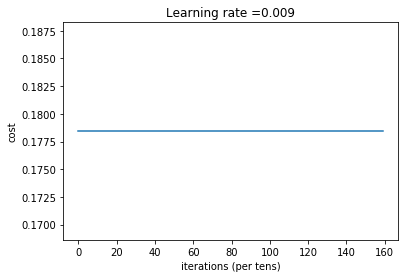

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.8644661
Test Accuracy: nan


In [12]:
_, _, parameters = model(X_train, y_train, X_test, y_test)

In [ ]:
_, _, parameters = model(X_train, y_train, X_test, y_test)

execution of epoch no:0
count:1,no_of_sample_passed:0
count:2,no_of_sample_passed:1024
count:3,no_of_sample_passed:2048
count:4,no_of_sample_passed:3072
count:5,no_of_sample_passed:4096
count:6,no_of_sample_passed:5120
count:7,no_of_sample_passed:6144
count:8,no_of_sample_passed:7168
count:9,no_of_sample_passed:8192
count:10,no_of_sample_passed:9216
count:11,no_of_sample_passed:10240
count:12,no_of_sample_passed:11264
count:13,no_of_sample_passed:12288
count:14,no_of_sample_passed:13312
count:15,no_of_sample_passed:14336
count:16,no_of_sample_passed:15360
count:17,no_of_sample_passed:16384
count:18,no_of_sample_passed:17408
count:19,no_of_sample_passed:18432
count:20,no_of_sample_passed:19456
count:21,no_of_sample_passed:20480
count:22,no_of_sample_passed:21504
count:23,no_of_sample_passed:22528
count:24,no_of_sample_passed:23552
count:25,no_of_sample_passed:24576
count:26,no_of_sample_passed:25600
count:27,no_of_sample_passed:26624
count:28,no_of_sample_passed:27648
count:29,no_of_sam

count:228,no_of_sample_passed:232448
count:229,no_of_sample_passed:233472
count:230,no_of_sample_passed:234496
count:231,no_of_sample_passed:235520
count:232,no_of_sample_passed:236544
count:233,no_of_sample_passed:237568
count:234,no_of_sample_passed:238592
count:235,no_of_sample_passed:239616
count:236,no_of_sample_passed:240640
count:237,no_of_sample_passed:241664
count:238,no_of_sample_passed:242688
count:239,no_of_sample_passed:243712
count:240,no_of_sample_passed:244736
count:241,no_of_sample_passed:245760
count:242,no_of_sample_passed:246784
count:243,no_of_sample_passed:247808
count:244,no_of_sample_passed:248832
count:245,no_of_sample_passed:249856
count:246,no_of_sample_passed:250880
count:247,no_of_sample_passed:251904
count:248,no_of_sample_passed:252928
count:249,no_of_sample_passed:253952
count:250,no_of_sample_passed:254976
count:251,no_of_sample_passed:256000
count:252,no_of_sample_passed:257024
count:253,no_of_sample_passed:258048
count:254,no_of_sample_passed:259072
c

count:450,no_of_sample_passed:459776
count:451,no_of_sample_passed:460800
count:452,no_of_sample_passed:461824
count:453,no_of_sample_passed:462848
count:454,no_of_sample_passed:463872
count:455,no_of_sample_passed:464896
count:456,no_of_sample_passed:465920
count:457,no_of_sample_passed:466944
count:458,no_of_sample_passed:467968
count:459,no_of_sample_passed:468992
count:460,no_of_sample_passed:470016
count:461,no_of_sample_passed:471040
count:462,no_of_sample_passed:472064
count:463,no_of_sample_passed:473088
count:464,no_of_sample_passed:474112
count:465,no_of_sample_passed:475136
count:466,no_of_sample_passed:476160
count:467,no_of_sample_passed:477184
count:468,no_of_sample_passed:478208
count:469,no_of_sample_passed:479232
count:470,no_of_sample_passed:480256
count:471,no_of_sample_passed:481280
count:472,no_of_sample_passed:482304
count:473,no_of_sample_passed:483328
count:474,no_of_sample_passed:484352
count:475,no_of_sample_passed:485376
count:476,no_of_sample_passed:486400
c

count:672,no_of_sample_passed:687104
count:673,no_of_sample_passed:688128
count:674,no_of_sample_passed:689152
count:675,no_of_sample_passed:690176
count:676,no_of_sample_passed:691200
count:677,no_of_sample_passed:692224
count:678,no_of_sample_passed:693248
count:679,no_of_sample_passed:694272
count:680,no_of_sample_passed:695296
count:681,no_of_sample_passed:696320
count:682,no_of_sample_passed:697344
count:683,no_of_sample_passed:698368
count:684,no_of_sample_passed:699392
count:685,no_of_sample_passed:700416
count:686,no_of_sample_passed:701440
count:687,no_of_sample_passed:702464
count:688,no_of_sample_passed:703488
count:689,no_of_sample_passed:704512
count:690,no_of_sample_passed:705536
count:691,no_of_sample_passed:706560
count:692,no_of_sample_passed:707584
count:693,no_of_sample_passed:708608
count:694,no_of_sample_passed:709632
count:695,no_of_sample_passed:710656
count:696,no_of_sample_passed:711680
count:697,no_of_sample_passed:712704
count:698,no_of_sample_passed:713728
c

count:894,no_of_sample_passed:914432
count:895,no_of_sample_passed:915456
count:896,no_of_sample_passed:916480
count:897,no_of_sample_passed:917504
count:898,no_of_sample_passed:918528
count:899,no_of_sample_passed:919552
count:900,no_of_sample_passed:920576
count:901,no_of_sample_passed:921600
count:902,no_of_sample_passed:922624
count:903,no_of_sample_passed:923648
count:904,no_of_sample_passed:924672
count:905,no_of_sample_passed:925696
count:906,no_of_sample_passed:926720
count:907,no_of_sample_passed:927744
count:908,no_of_sample_passed:928768
count:909,no_of_sample_passed:929792
count:910,no_of_sample_passed:930816
count:911,no_of_sample_passed:931840
count:912,no_of_sample_passed:932864
count:913,no_of_sample_passed:933888
count:914,no_of_sample_passed:934912
count:915,no_of_sample_passed:935936
count:916,no_of_sample_passed:936960
count:917,no_of_sample_passed:937984
count:918,no_of_sample_passed:939008
count:919,no_of_sample_passed:940032
count:920,no_of_sample_passed:941056
c

count:1109,no_of_sample_passed:1134592
count:1110,no_of_sample_passed:1135616
count:1111,no_of_sample_passed:1136640
count:1112,no_of_sample_passed:1137664
count:1113,no_of_sample_passed:1138688
count:1114,no_of_sample_passed:1139712
count:1115,no_of_sample_passed:1140736
count:1116,no_of_sample_passed:1141760
count:1117,no_of_sample_passed:1142784
count:1118,no_of_sample_passed:1143808
count:1119,no_of_sample_passed:1144832
count:1120,no_of_sample_passed:1145856
count:1121,no_of_sample_passed:1146880
count:1122,no_of_sample_passed:1147904
count:1123,no_of_sample_passed:1148928
count:1124,no_of_sample_passed:1149952
count:1125,no_of_sample_passed:1150976
count:1126,no_of_sample_passed:1152000
count:1127,no_of_sample_passed:1153024
count:1128,no_of_sample_passed:1154048
count:1129,no_of_sample_passed:1155072
count:1130,no_of_sample_passed:1156096
count:1131,no_of_sample_passed:1157120
count:1132,no_of_sample_passed:1158144
count:1133,no_of_sample_passed:1159168
count:1134,no_of_sample_p

count:74,no_of_sample_passed:74752
count:75,no_of_sample_passed:75776
count:76,no_of_sample_passed:76800
count:77,no_of_sample_passed:77824
count:78,no_of_sample_passed:78848
count:79,no_of_sample_passed:79872
count:80,no_of_sample_passed:80896
count:81,no_of_sample_passed:81920
count:82,no_of_sample_passed:82944
count:83,no_of_sample_passed:83968
count:84,no_of_sample_passed:84992
count:85,no_of_sample_passed:86016
count:86,no_of_sample_passed:87040
count:87,no_of_sample_passed:88064
count:88,no_of_sample_passed:89088
count:89,no_of_sample_passed:90112
count:90,no_of_sample_passed:91136
count:91,no_of_sample_passed:92160
count:92,no_of_sample_passed:93184
count:93,no_of_sample_passed:94208
count:94,no_of_sample_passed:95232
count:95,no_of_sample_passed:96256
count:96,no_of_sample_passed:97280
count:97,no_of_sample_passed:98304
count:98,no_of_sample_passed:99328
count:99,no_of_sample_passed:100352
count:100,no_of_sample_passed:101376
count:101,no_of_sample_passed:102400
count:102,no_of

count:297,no_of_sample_passed:303104
count:298,no_of_sample_passed:304128
count:299,no_of_sample_passed:305152
count:300,no_of_sample_passed:306176
count:301,no_of_sample_passed:307200
count:302,no_of_sample_passed:308224
count:303,no_of_sample_passed:309248
count:304,no_of_sample_passed:310272
count:305,no_of_sample_passed:311296
count:306,no_of_sample_passed:312320
count:307,no_of_sample_passed:313344
count:308,no_of_sample_passed:314368
count:309,no_of_sample_passed:315392
count:310,no_of_sample_passed:316416
count:311,no_of_sample_passed:317440
count:312,no_of_sample_passed:318464
count:313,no_of_sample_passed:319488
count:314,no_of_sample_passed:320512
count:315,no_of_sample_passed:321536
count:316,no_of_sample_passed:322560
count:317,no_of_sample_passed:323584
count:318,no_of_sample_passed:324608
count:319,no_of_sample_passed:325632
count:320,no_of_sample_passed:326656
count:321,no_of_sample_passed:327680
count:322,no_of_sample_passed:328704
count:323,no_of_sample_passed:329728
c

count:519,no_of_sample_passed:530432
count:520,no_of_sample_passed:531456
count:521,no_of_sample_passed:532480
count:522,no_of_sample_passed:533504
count:523,no_of_sample_passed:534528
count:524,no_of_sample_passed:535552
count:525,no_of_sample_passed:536576
count:526,no_of_sample_passed:537600
count:527,no_of_sample_passed:538624
count:528,no_of_sample_passed:539648
count:529,no_of_sample_passed:540672
count:530,no_of_sample_passed:541696
count:531,no_of_sample_passed:542720
count:532,no_of_sample_passed:543744
count:533,no_of_sample_passed:544768
count:534,no_of_sample_passed:545792
count:535,no_of_sample_passed:546816
count:536,no_of_sample_passed:547840
count:537,no_of_sample_passed:548864
count:538,no_of_sample_passed:549888
count:539,no_of_sample_passed:550912
count:540,no_of_sample_passed:551936
count:541,no_of_sample_passed:552960
count:542,no_of_sample_passed:553984
count:543,no_of_sample_passed:555008
count:544,no_of_sample_passed:556032
count:545,no_of_sample_passed:557056
c

count:741,no_of_sample_passed:757760
count:742,no_of_sample_passed:758784
count:743,no_of_sample_passed:759808
count:744,no_of_sample_passed:760832
count:745,no_of_sample_passed:761856
count:746,no_of_sample_passed:762880
count:747,no_of_sample_passed:763904
count:748,no_of_sample_passed:764928
count:749,no_of_sample_passed:765952
count:750,no_of_sample_passed:766976
count:751,no_of_sample_passed:768000
count:752,no_of_sample_passed:769024
count:753,no_of_sample_passed:770048
count:754,no_of_sample_passed:771072
count:755,no_of_sample_passed:772096
count:756,no_of_sample_passed:773120
count:757,no_of_sample_passed:774144
count:758,no_of_sample_passed:775168
count:759,no_of_sample_passed:776192
count:760,no_of_sample_passed:777216
count:761,no_of_sample_passed:778240
count:762,no_of_sample_passed:779264
count:763,no_of_sample_passed:780288
count:764,no_of_sample_passed:781312
count:765,no_of_sample_passed:782336
count:766,no_of_sample_passed:783360
count:767,no_of_sample_passed:784384
c

count:963,no_of_sample_passed:985088
count:964,no_of_sample_passed:986112
count:965,no_of_sample_passed:987136
count:966,no_of_sample_passed:988160
count:967,no_of_sample_passed:989184
count:968,no_of_sample_passed:990208
count:969,no_of_sample_passed:991232
count:970,no_of_sample_passed:992256
count:971,no_of_sample_passed:993280
count:972,no_of_sample_passed:994304
count:973,no_of_sample_passed:995328
count:974,no_of_sample_passed:996352
count:975,no_of_sample_passed:997376
count:976,no_of_sample_passed:998400
count:977,no_of_sample_passed:999424
count:978,no_of_sample_passed:1000448
count:979,no_of_sample_passed:1001472
count:980,no_of_sample_passed:1002496
count:981,no_of_sample_passed:1003520
count:982,no_of_sample_passed:1004544
count:983,no_of_sample_passed:1005568
count:984,no_of_sample_passed:1006592
count:985,no_of_sample_passed:1007616
count:986,no_of_sample_passed:1008640
count:987,no_of_sample_passed:1009664
count:988,no_of_sample_passed:1010688
count:989,no_of_sample_pass

count:1175,no_of_sample_passed:1202176
count:1176,no_of_sample_passed:1203200
count:1177,no_of_sample_passed:1204224
count:1178,no_of_sample_passed:1205248
count:1179,no_of_sample_passed:1206272
count:1180,no_of_sample_passed:1207296
count:1181,no_of_sample_passed:1208320
count:1182,no_of_sample_passed:1209344
count:1183,no_of_sample_passed:1210368
count:1184,no_of_sample_passed:1211392
count:1185,no_of_sample_passed:1212416
count:1186,no_of_sample_passed:1213440
count:1187,no_of_sample_passed:1214464
count:1188,no_of_sample_passed:1215488
count:1189,no_of_sample_passed:1216512
count:1190,no_of_sample_passed:1217536
count:1191,no_of_sample_passed:1218560
count:1192,no_of_sample_passed:1219584
count:1193,no_of_sample_passed:1220608
count:1194,no_of_sample_passed:1221632
count:1195,no_of_sample_passed:1222656
count:1196,no_of_sample_passed:1223680
count:1197,no_of_sample_passed:1224704
count:1198,no_of_sample_passed:1225728
count:1199,no_of_sample_passed:1226752
count:1200,no_of_sample_p

count:146,no_of_sample_passed:148480
count:147,no_of_sample_passed:149504
count:148,no_of_sample_passed:150528
count:149,no_of_sample_passed:151552
count:150,no_of_sample_passed:152576
count:151,no_of_sample_passed:153600
count:152,no_of_sample_passed:154624
count:153,no_of_sample_passed:155648
count:154,no_of_sample_passed:156672
count:155,no_of_sample_passed:157696
count:156,no_of_sample_passed:158720
count:157,no_of_sample_passed:159744
count:158,no_of_sample_passed:160768
count:159,no_of_sample_passed:161792
count:160,no_of_sample_passed:162816
count:161,no_of_sample_passed:163840
count:162,no_of_sample_passed:164864
count:163,no_of_sample_passed:165888
count:164,no_of_sample_passed:166912
count:165,no_of_sample_passed:167936
count:166,no_of_sample_passed:168960
count:167,no_of_sample_passed:169984
count:168,no_of_sample_passed:171008
count:169,no_of_sample_passed:172032
count:170,no_of_sample_passed:173056
count:171,no_of_sample_passed:174080
count:172,no_of_sample_passed:175104
c

count:368,no_of_sample_passed:375808
count:369,no_of_sample_passed:376832
count:370,no_of_sample_passed:377856
count:371,no_of_sample_passed:378880
count:372,no_of_sample_passed:379904
count:373,no_of_sample_passed:380928
count:374,no_of_sample_passed:381952
count:375,no_of_sample_passed:382976
count:376,no_of_sample_passed:384000
count:377,no_of_sample_passed:385024
count:378,no_of_sample_passed:386048
count:379,no_of_sample_passed:387072
count:380,no_of_sample_passed:388096
count:381,no_of_sample_passed:389120
count:382,no_of_sample_passed:390144
count:383,no_of_sample_passed:391168
count:384,no_of_sample_passed:392192
count:385,no_of_sample_passed:393216
count:386,no_of_sample_passed:394240
count:387,no_of_sample_passed:395264
count:388,no_of_sample_passed:396288
count:389,no_of_sample_passed:397312
count:390,no_of_sample_passed:398336
count:391,no_of_sample_passed:399360
count:392,no_of_sample_passed:400384
count:393,no_of_sample_passed:401408
count:394,no_of_sample_passed:402432
c

count:590,no_of_sample_passed:603136
count:591,no_of_sample_passed:604160
count:592,no_of_sample_passed:605184
count:593,no_of_sample_passed:606208
count:594,no_of_sample_passed:607232
count:595,no_of_sample_passed:608256
count:596,no_of_sample_passed:609280
count:597,no_of_sample_passed:610304
count:598,no_of_sample_passed:611328
count:599,no_of_sample_passed:612352
count:600,no_of_sample_passed:613376
count:601,no_of_sample_passed:614400
count:602,no_of_sample_passed:615424
count:603,no_of_sample_passed:616448
count:604,no_of_sample_passed:617472
count:605,no_of_sample_passed:618496
count:606,no_of_sample_passed:619520
count:607,no_of_sample_passed:620544
count:608,no_of_sample_passed:621568
count:609,no_of_sample_passed:622592
count:610,no_of_sample_passed:623616
count:611,no_of_sample_passed:624640
count:612,no_of_sample_passed:625664
count:613,no_of_sample_passed:626688
count:614,no_of_sample_passed:627712
count:615,no_of_sample_passed:628736
count:616,no_of_sample_passed:629760
c

count:812,no_of_sample_passed:830464
count:813,no_of_sample_passed:831488
count:814,no_of_sample_passed:832512
count:815,no_of_sample_passed:833536
count:816,no_of_sample_passed:834560
count:817,no_of_sample_passed:835584
count:818,no_of_sample_passed:836608
count:819,no_of_sample_passed:837632
count:820,no_of_sample_passed:838656
count:821,no_of_sample_passed:839680
count:822,no_of_sample_passed:840704
count:823,no_of_sample_passed:841728
count:824,no_of_sample_passed:842752
count:825,no_of_sample_passed:843776
count:826,no_of_sample_passed:844800
count:827,no_of_sample_passed:845824
count:828,no_of_sample_passed:846848
count:829,no_of_sample_passed:847872
count:830,no_of_sample_passed:848896
count:831,no_of_sample_passed:849920
count:832,no_of_sample_passed:850944
count:833,no_of_sample_passed:851968
count:834,no_of_sample_passed:852992
count:835,no_of_sample_passed:854016
count:836,no_of_sample_passed:855040
count:837,no_of_sample_passed:856064
count:838,no_of_sample_passed:857088
c

count:1032,no_of_sample_passed:1055744
count:1033,no_of_sample_passed:1056768
count:1034,no_of_sample_passed:1057792
count:1035,no_of_sample_passed:1058816
count:1036,no_of_sample_passed:1059840
count:1037,no_of_sample_passed:1060864
count:1038,no_of_sample_passed:1061888
count:1039,no_of_sample_passed:1062912
count:1040,no_of_sample_passed:1063936
count:1041,no_of_sample_passed:1064960
count:1042,no_of_sample_passed:1065984
count:1043,no_of_sample_passed:1067008
count:1044,no_of_sample_passed:1068032
count:1045,no_of_sample_passed:1069056
count:1046,no_of_sample_passed:1070080
count:1047,no_of_sample_passed:1071104
count:1048,no_of_sample_passed:1072128
count:1049,no_of_sample_passed:1073152
count:1050,no_of_sample_passed:1074176
count:1051,no_of_sample_passed:1075200
count:1052,no_of_sample_passed:1076224
count:1053,no_of_sample_passed:1077248
count:1054,no_of_sample_passed:1078272
count:1055,no_of_sample_passed:1079296
count:1056,no_of_sample_passed:1080320
count:1057,no_of_sample_p

count:1243,no_of_sample_passed:1271808
count:1244,no_of_sample_passed:1272832
count:1245,no_of_sample_passed:1273856
count:1246,no_of_sample_passed:1274880
count:1247,no_of_sample_passed:1275904
count:1248,no_of_sample_passed:1276928
count:1249,no_of_sample_passed:1277952
count:1250,no_of_sample_passed:1278976
count:1251,no_of_sample_passed:1280000
count:1252,no_of_sample_passed:1281024
execution of epoch no:3
count:1,no_of_sample_passed:0
count:2,no_of_sample_passed:1024
count:3,no_of_sample_passed:2048
count:4,no_of_sample_passed:3072
count:5,no_of_sample_passed:4096
count:6,no_of_sample_passed:5120
count:7,no_of_sample_passed:6144
count:8,no_of_sample_passed:7168
count:9,no_of_sample_passed:8192
count:10,no_of_sample_passed:9216
count:11,no_of_sample_passed:10240
count:12,no_of_sample_passed:11264
count:13,no_of_sample_passed:12288
count:14,no_of_sample_passed:13312
count:15,no_of_sample_passed:14336
count:16,no_of_sample_passed:15360
count:17,no_of_sample_passed:16384
count:18,no_o

count:218,no_of_sample_passed:222208
count:219,no_of_sample_passed:223232
count:220,no_of_sample_passed:224256
count:221,no_of_sample_passed:225280
count:222,no_of_sample_passed:226304
count:223,no_of_sample_passed:227328
count:224,no_of_sample_passed:228352
count:225,no_of_sample_passed:229376
count:226,no_of_sample_passed:230400
count:227,no_of_sample_passed:231424
count:228,no_of_sample_passed:232448
count:229,no_of_sample_passed:233472
count:230,no_of_sample_passed:234496
count:231,no_of_sample_passed:235520
count:232,no_of_sample_passed:236544
count:233,no_of_sample_passed:237568
count:234,no_of_sample_passed:238592
count:235,no_of_sample_passed:239616
count:236,no_of_sample_passed:240640
count:237,no_of_sample_passed:241664
count:238,no_of_sample_passed:242688
count:239,no_of_sample_passed:243712
count:240,no_of_sample_passed:244736
count:241,no_of_sample_passed:245760
count:242,no_of_sample_passed:246784
count:243,no_of_sample_passed:247808
count:244,no_of_sample_passed:248832
c

count:440,no_of_sample_passed:449536
count:441,no_of_sample_passed:450560
count:442,no_of_sample_passed:451584
count:443,no_of_sample_passed:452608
count:444,no_of_sample_passed:453632
count:445,no_of_sample_passed:454656
count:446,no_of_sample_passed:455680
count:447,no_of_sample_passed:456704
count:448,no_of_sample_passed:457728
count:449,no_of_sample_passed:458752
count:450,no_of_sample_passed:459776
count:451,no_of_sample_passed:460800
count:452,no_of_sample_passed:461824
count:453,no_of_sample_passed:462848
count:454,no_of_sample_passed:463872
count:455,no_of_sample_passed:464896
count:456,no_of_sample_passed:465920
count:457,no_of_sample_passed:466944
count:458,no_of_sample_passed:467968
count:459,no_of_sample_passed:468992
count:460,no_of_sample_passed:470016
count:461,no_of_sample_passed:471040
count:462,no_of_sample_passed:472064
count:463,no_of_sample_passed:473088
count:464,no_of_sample_passed:474112
count:465,no_of_sample_passed:475136
count:466,no_of_sample_passed:476160
c

count:662,no_of_sample_passed:676864
count:663,no_of_sample_passed:677888
count:664,no_of_sample_passed:678912
count:665,no_of_sample_passed:679936
count:666,no_of_sample_passed:680960
count:667,no_of_sample_passed:681984
count:668,no_of_sample_passed:683008
count:669,no_of_sample_passed:684032
count:670,no_of_sample_passed:685056
count:671,no_of_sample_passed:686080
count:672,no_of_sample_passed:687104
count:673,no_of_sample_passed:688128
count:674,no_of_sample_passed:689152
count:675,no_of_sample_passed:690176
count:676,no_of_sample_passed:691200
count:677,no_of_sample_passed:692224
count:678,no_of_sample_passed:693248
count:679,no_of_sample_passed:694272
count:680,no_of_sample_passed:695296
count:681,no_of_sample_passed:696320
count:682,no_of_sample_passed:697344
count:683,no_of_sample_passed:698368
count:684,no_of_sample_passed:699392
count:685,no_of_sample_passed:700416
count:686,no_of_sample_passed:701440
count:687,no_of_sample_passed:702464
count:688,no_of_sample_passed:703488
c

count:884,no_of_sample_passed:904192
count:885,no_of_sample_passed:905216
count:886,no_of_sample_passed:906240
count:887,no_of_sample_passed:907264
count:888,no_of_sample_passed:908288
count:889,no_of_sample_passed:909312
count:890,no_of_sample_passed:910336
count:891,no_of_sample_passed:911360
count:892,no_of_sample_passed:912384
count:893,no_of_sample_passed:913408
count:894,no_of_sample_passed:914432
count:895,no_of_sample_passed:915456
count:896,no_of_sample_passed:916480
count:897,no_of_sample_passed:917504
count:898,no_of_sample_passed:918528
count:899,no_of_sample_passed:919552
count:900,no_of_sample_passed:920576
count:901,no_of_sample_passed:921600
count:902,no_of_sample_passed:922624
count:903,no_of_sample_passed:923648
count:904,no_of_sample_passed:924672
count:905,no_of_sample_passed:925696
count:906,no_of_sample_passed:926720
count:907,no_of_sample_passed:927744
count:908,no_of_sample_passed:928768
count:909,no_of_sample_passed:929792
count:910,no_of_sample_passed:930816
c

count:1100,no_of_sample_passed:1125376
count:1101,no_of_sample_passed:1126400
count:1102,no_of_sample_passed:1127424
count:1103,no_of_sample_passed:1128448
count:1104,no_of_sample_passed:1129472
count:1105,no_of_sample_passed:1130496
count:1106,no_of_sample_passed:1131520
count:1107,no_of_sample_passed:1132544
count:1108,no_of_sample_passed:1133568
count:1109,no_of_sample_passed:1134592
count:1110,no_of_sample_passed:1135616
count:1111,no_of_sample_passed:1136640
count:1112,no_of_sample_passed:1137664
count:1113,no_of_sample_passed:1138688
count:1114,no_of_sample_passed:1139712
count:1115,no_of_sample_passed:1140736
count:1116,no_of_sample_passed:1141760
count:1117,no_of_sample_passed:1142784
count:1118,no_of_sample_passed:1143808
count:1119,no_of_sample_passed:1144832
count:1120,no_of_sample_passed:1145856
count:1121,no_of_sample_passed:1146880
count:1122,no_of_sample_passed:1147904
count:1123,no_of_sample_passed:1148928
count:1124,no_of_sample_passed:1149952
count:1125,no_of_sample_p

count:65,no_of_sample_passed:65536
count:66,no_of_sample_passed:66560
count:67,no_of_sample_passed:67584
count:68,no_of_sample_passed:68608
count:69,no_of_sample_passed:69632
count:70,no_of_sample_passed:70656
count:71,no_of_sample_passed:71680
count:72,no_of_sample_passed:72704
count:73,no_of_sample_passed:73728
count:74,no_of_sample_passed:74752
count:75,no_of_sample_passed:75776
count:76,no_of_sample_passed:76800
count:77,no_of_sample_passed:77824
count:78,no_of_sample_passed:78848
count:79,no_of_sample_passed:79872
count:80,no_of_sample_passed:80896
count:81,no_of_sample_passed:81920
count:82,no_of_sample_passed:82944
count:83,no_of_sample_passed:83968
count:84,no_of_sample_passed:84992
count:85,no_of_sample_passed:86016
count:86,no_of_sample_passed:87040
count:87,no_of_sample_passed:88064
count:88,no_of_sample_passed:89088
count:89,no_of_sample_passed:90112
count:90,no_of_sample_passed:91136
count:91,no_of_sample_passed:92160
count:92,no_of_sample_passed:93184
count:93,no_of_sampl

count:289,no_of_sample_passed:294912
count:290,no_of_sample_passed:295936
count:291,no_of_sample_passed:296960
count:292,no_of_sample_passed:297984
count:293,no_of_sample_passed:299008
count:294,no_of_sample_passed:300032
count:295,no_of_sample_passed:301056
count:296,no_of_sample_passed:302080
count:297,no_of_sample_passed:303104
count:298,no_of_sample_passed:304128
count:299,no_of_sample_passed:305152
count:300,no_of_sample_passed:306176
count:301,no_of_sample_passed:307200
count:302,no_of_sample_passed:308224
count:303,no_of_sample_passed:309248
count:304,no_of_sample_passed:310272
count:305,no_of_sample_passed:311296
count:306,no_of_sample_passed:312320
count:307,no_of_sample_passed:313344
count:308,no_of_sample_passed:314368
count:309,no_of_sample_passed:315392
count:310,no_of_sample_passed:316416
count:311,no_of_sample_passed:317440
count:312,no_of_sample_passed:318464
count:313,no_of_sample_passed:319488
count:314,no_of_sample_passed:320512
count:315,no_of_sample_passed:321536
c

count:511,no_of_sample_passed:522240
count:512,no_of_sample_passed:523264
count:513,no_of_sample_passed:524288
count:514,no_of_sample_passed:525312
count:515,no_of_sample_passed:526336
count:516,no_of_sample_passed:527360
count:517,no_of_sample_passed:528384
count:518,no_of_sample_passed:529408
count:519,no_of_sample_passed:530432
count:520,no_of_sample_passed:531456
count:521,no_of_sample_passed:532480
count:522,no_of_sample_passed:533504
count:523,no_of_sample_passed:534528
count:524,no_of_sample_passed:535552
count:525,no_of_sample_passed:536576
count:526,no_of_sample_passed:537600
count:527,no_of_sample_passed:538624
count:528,no_of_sample_passed:539648
count:529,no_of_sample_passed:540672
count:530,no_of_sample_passed:541696
count:531,no_of_sample_passed:542720
count:532,no_of_sample_passed:543744
count:533,no_of_sample_passed:544768
count:534,no_of_sample_passed:545792
count:535,no_of_sample_passed:546816
count:536,no_of_sample_passed:547840
count:537,no_of_sample_passed:548864
c

count:733,no_of_sample_passed:749568
count:734,no_of_sample_passed:750592
count:735,no_of_sample_passed:751616
count:736,no_of_sample_passed:752640
count:737,no_of_sample_passed:753664
count:738,no_of_sample_passed:754688
count:739,no_of_sample_passed:755712
count:740,no_of_sample_passed:756736
count:741,no_of_sample_passed:757760
count:742,no_of_sample_passed:758784
count:743,no_of_sample_passed:759808
count:744,no_of_sample_passed:760832
count:745,no_of_sample_passed:761856
count:746,no_of_sample_passed:762880
count:747,no_of_sample_passed:763904
count:748,no_of_sample_passed:764928
count:749,no_of_sample_passed:765952
count:750,no_of_sample_passed:766976
count:751,no_of_sample_passed:768000
count:752,no_of_sample_passed:769024
count:753,no_of_sample_passed:770048
count:754,no_of_sample_passed:771072
count:755,no_of_sample_passed:772096
count:756,no_of_sample_passed:773120
count:757,no_of_sample_passed:774144
count:758,no_of_sample_passed:775168
count:759,no_of_sample_passed:776192
c

count:955,no_of_sample_passed:976896
count:956,no_of_sample_passed:977920
count:957,no_of_sample_passed:978944
count:958,no_of_sample_passed:979968
count:959,no_of_sample_passed:980992
count:960,no_of_sample_passed:982016
count:961,no_of_sample_passed:983040
count:962,no_of_sample_passed:984064
count:963,no_of_sample_passed:985088
count:964,no_of_sample_passed:986112
count:965,no_of_sample_passed:987136
count:966,no_of_sample_passed:988160
count:967,no_of_sample_passed:989184
count:968,no_of_sample_passed:990208
count:969,no_of_sample_passed:991232
count:970,no_of_sample_passed:992256
count:971,no_of_sample_passed:993280
count:972,no_of_sample_passed:994304
count:973,no_of_sample_passed:995328
count:974,no_of_sample_passed:996352
count:975,no_of_sample_passed:997376
count:976,no_of_sample_passed:998400
count:977,no_of_sample_passed:999424
count:978,no_of_sample_passed:1000448
count:979,no_of_sample_passed:1001472
count:980,no_of_sample_passed:1002496
count:981,no_of_sample_passed:10035

count:1167,no_of_sample_passed:1193984
count:1168,no_of_sample_passed:1195008
count:1169,no_of_sample_passed:1196032
count:1170,no_of_sample_passed:1197056
count:1171,no_of_sample_passed:1198080
count:1172,no_of_sample_passed:1199104
count:1173,no_of_sample_passed:1200128
count:1174,no_of_sample_passed:1201152
count:1175,no_of_sample_passed:1202176
count:1176,no_of_sample_passed:1203200
count:1177,no_of_sample_passed:1204224
count:1178,no_of_sample_passed:1205248
count:1179,no_of_sample_passed:1206272
count:1180,no_of_sample_passed:1207296
count:1181,no_of_sample_passed:1208320
count:1182,no_of_sample_passed:1209344
count:1183,no_of_sample_passed:1210368
count:1184,no_of_sample_passed:1211392
count:1185,no_of_sample_passed:1212416
count:1186,no_of_sample_passed:1213440
count:1187,no_of_sample_passed:1214464
count:1188,no_of_sample_passed:1215488
count:1189,no_of_sample_passed:1216512
count:1190,no_of_sample_passed:1217536
count:1191,no_of_sample_passed:1218560
count:1192,no_of_sample_p

count:138,no_of_sample_passed:140288
count:139,no_of_sample_passed:141312
count:140,no_of_sample_passed:142336
count:141,no_of_sample_passed:143360
count:142,no_of_sample_passed:144384
count:143,no_of_sample_passed:145408
count:144,no_of_sample_passed:146432
count:145,no_of_sample_passed:147456
count:146,no_of_sample_passed:148480
count:147,no_of_sample_passed:149504
count:148,no_of_sample_passed:150528
count:149,no_of_sample_passed:151552
count:150,no_of_sample_passed:152576
count:151,no_of_sample_passed:153600
count:152,no_of_sample_passed:154624
count:153,no_of_sample_passed:155648
count:154,no_of_sample_passed:156672
count:155,no_of_sample_passed:157696
count:156,no_of_sample_passed:158720
count:157,no_of_sample_passed:159744
count:158,no_of_sample_passed:160768
count:159,no_of_sample_passed:161792
count:160,no_of_sample_passed:162816
count:161,no_of_sample_passed:163840
count:162,no_of_sample_passed:164864
count:163,no_of_sample_passed:165888
count:164,no_of_sample_passed:166912
c

count:360,no_of_sample_passed:367616
count:361,no_of_sample_passed:368640
count:362,no_of_sample_passed:369664
count:363,no_of_sample_passed:370688
count:364,no_of_sample_passed:371712
count:365,no_of_sample_passed:372736
count:366,no_of_sample_passed:373760
count:367,no_of_sample_passed:374784
count:368,no_of_sample_passed:375808
count:369,no_of_sample_passed:376832
count:370,no_of_sample_passed:377856
count:371,no_of_sample_passed:378880
count:372,no_of_sample_passed:379904
count:373,no_of_sample_passed:380928
count:374,no_of_sample_passed:381952
count:375,no_of_sample_passed:382976
count:376,no_of_sample_passed:384000
count:377,no_of_sample_passed:385024
count:378,no_of_sample_passed:386048
count:379,no_of_sample_passed:387072
count:380,no_of_sample_passed:388096
count:381,no_of_sample_passed:389120
count:382,no_of_sample_passed:390144
count:383,no_of_sample_passed:391168
count:384,no_of_sample_passed:392192
count:385,no_of_sample_passed:393216
count:386,no_of_sample_passed:394240
c

count:582,no_of_sample_passed:594944
count:583,no_of_sample_passed:595968
count:584,no_of_sample_passed:596992
count:585,no_of_sample_passed:598016
count:586,no_of_sample_passed:599040
count:587,no_of_sample_passed:600064
count:588,no_of_sample_passed:601088
count:589,no_of_sample_passed:602112
count:590,no_of_sample_passed:603136
count:591,no_of_sample_passed:604160
count:592,no_of_sample_passed:605184
count:593,no_of_sample_passed:606208
count:594,no_of_sample_passed:607232
count:595,no_of_sample_passed:608256
count:596,no_of_sample_passed:609280
count:597,no_of_sample_passed:610304
count:598,no_of_sample_passed:611328
count:599,no_of_sample_passed:612352
count:600,no_of_sample_passed:613376
count:601,no_of_sample_passed:614400
count:602,no_of_sample_passed:615424
count:603,no_of_sample_passed:616448
count:604,no_of_sample_passed:617472
count:605,no_of_sample_passed:618496
count:606,no_of_sample_passed:619520
count:607,no_of_sample_passed:620544
count:608,no_of_sample_passed:621568
c

count:804,no_of_sample_passed:822272
count:805,no_of_sample_passed:823296
count:806,no_of_sample_passed:824320
count:807,no_of_sample_passed:825344
count:808,no_of_sample_passed:826368
count:809,no_of_sample_passed:827392
count:810,no_of_sample_passed:828416
count:811,no_of_sample_passed:829440
count:812,no_of_sample_passed:830464
count:813,no_of_sample_passed:831488
count:814,no_of_sample_passed:832512
count:815,no_of_sample_passed:833536
count:816,no_of_sample_passed:834560
count:817,no_of_sample_passed:835584
count:818,no_of_sample_passed:836608
count:819,no_of_sample_passed:837632
count:820,no_of_sample_passed:838656
count:821,no_of_sample_passed:839680
count:822,no_of_sample_passed:840704
count:823,no_of_sample_passed:841728
count:824,no_of_sample_passed:842752
count:825,no_of_sample_passed:843776
count:826,no_of_sample_passed:844800
count:827,no_of_sample_passed:845824
count:828,no_of_sample_passed:846848
count:829,no_of_sample_passed:847872
count:830,no_of_sample_passed:848896
c

count:1024,no_of_sample_passed:1047552
count:1025,no_of_sample_passed:1048576
count:1026,no_of_sample_passed:1049600
count:1027,no_of_sample_passed:1050624
count:1028,no_of_sample_passed:1051648
count:1029,no_of_sample_passed:1052672
count:1030,no_of_sample_passed:1053696
count:1031,no_of_sample_passed:1054720
count:1032,no_of_sample_passed:1055744
count:1033,no_of_sample_passed:1056768
count:1034,no_of_sample_passed:1057792
count:1035,no_of_sample_passed:1058816
count:1036,no_of_sample_passed:1059840
count:1037,no_of_sample_passed:1060864
count:1038,no_of_sample_passed:1061888
count:1039,no_of_sample_passed:1062912
count:1040,no_of_sample_passed:1063936
count:1041,no_of_sample_passed:1064960
count:1042,no_of_sample_passed:1065984
count:1043,no_of_sample_passed:1067008
count:1044,no_of_sample_passed:1068032
count:1045,no_of_sample_passed:1069056
count:1046,no_of_sample_passed:1070080
count:1047,no_of_sample_passed:1071104
count:1048,no_of_sample_passed:1072128
count:1049,no_of_sample_p

count:1235,no_of_sample_passed:1263616
count:1236,no_of_sample_passed:1264640
count:1237,no_of_sample_passed:1265664
count:1238,no_of_sample_passed:1266688
count:1239,no_of_sample_passed:1267712
count:1240,no_of_sample_passed:1268736
count:1241,no_of_sample_passed:1269760
count:1242,no_of_sample_passed:1270784
count:1243,no_of_sample_passed:1271808
count:1244,no_of_sample_passed:1272832
count:1245,no_of_sample_passed:1273856
count:1246,no_of_sample_passed:1274880
count:1247,no_of_sample_passed:1275904
count:1248,no_of_sample_passed:1276928
count:1249,no_of_sample_passed:1277952
count:1250,no_of_sample_passed:1278976
count:1251,no_of_sample_passed:1280000
count:1252,no_of_sample_passed:1281024
Cost after epoch 5: 0.109462
execution of epoch no:6
count:1,no_of_sample_passed:0
count:2,no_of_sample_passed:1024
count:3,no_of_sample_passed:2048
count:4,no_of_sample_passed:3072
count:5,no_of_sample_passed:4096
count:6,no_of_sample_passed:5120
count:7,no_of_sample_passed:6144
count:8,no_of_sam

count:208,no_of_sample_passed:211968
count:209,no_of_sample_passed:212992
count:210,no_of_sample_passed:214016
count:211,no_of_sample_passed:215040
count:212,no_of_sample_passed:216064
count:213,no_of_sample_passed:217088
count:214,no_of_sample_passed:218112
count:215,no_of_sample_passed:219136
count:216,no_of_sample_passed:220160
count:217,no_of_sample_passed:221184
count:218,no_of_sample_passed:222208
count:219,no_of_sample_passed:223232
count:220,no_of_sample_passed:224256
count:221,no_of_sample_passed:225280
count:222,no_of_sample_passed:226304
count:223,no_of_sample_passed:227328
count:224,no_of_sample_passed:228352
count:225,no_of_sample_passed:229376
count:226,no_of_sample_passed:230400
count:227,no_of_sample_passed:231424
count:228,no_of_sample_passed:232448
count:229,no_of_sample_passed:233472
count:230,no_of_sample_passed:234496
count:231,no_of_sample_passed:235520
count:232,no_of_sample_passed:236544
count:233,no_of_sample_passed:237568
count:234,no_of_sample_passed:238592
c

count:430,no_of_sample_passed:439296
count:431,no_of_sample_passed:440320
count:432,no_of_sample_passed:441344
count:433,no_of_sample_passed:442368
count:434,no_of_sample_passed:443392
count:435,no_of_sample_passed:444416
count:436,no_of_sample_passed:445440
count:437,no_of_sample_passed:446464
count:438,no_of_sample_passed:447488
count:439,no_of_sample_passed:448512
count:440,no_of_sample_passed:449536
count:441,no_of_sample_passed:450560
count:442,no_of_sample_passed:451584
count:443,no_of_sample_passed:452608
count:444,no_of_sample_passed:453632
count:445,no_of_sample_passed:454656
count:446,no_of_sample_passed:455680
count:447,no_of_sample_passed:456704
count:448,no_of_sample_passed:457728
count:449,no_of_sample_passed:458752
count:450,no_of_sample_passed:459776
count:451,no_of_sample_passed:460800
count:452,no_of_sample_passed:461824
count:453,no_of_sample_passed:462848
count:454,no_of_sample_passed:463872
count:455,no_of_sample_passed:464896
count:456,no_of_sample_passed:465920
c

count:652,no_of_sample_passed:666624
count:653,no_of_sample_passed:667648
count:654,no_of_sample_passed:668672
count:655,no_of_sample_passed:669696
count:656,no_of_sample_passed:670720
count:657,no_of_sample_passed:671744
count:658,no_of_sample_passed:672768
count:659,no_of_sample_passed:673792
count:660,no_of_sample_passed:674816
count:661,no_of_sample_passed:675840
count:662,no_of_sample_passed:676864
count:663,no_of_sample_passed:677888
count:664,no_of_sample_passed:678912
count:665,no_of_sample_passed:679936
count:666,no_of_sample_passed:680960
count:667,no_of_sample_passed:681984
count:668,no_of_sample_passed:683008
count:669,no_of_sample_passed:684032
count:670,no_of_sample_passed:685056
count:671,no_of_sample_passed:686080
count:672,no_of_sample_passed:687104
count:673,no_of_sample_passed:688128
count:674,no_of_sample_passed:689152
count:675,no_of_sample_passed:690176
count:676,no_of_sample_passed:691200
count:677,no_of_sample_passed:692224
count:678,no_of_sample_passed:693248
c

count:874,no_of_sample_passed:893952
count:875,no_of_sample_passed:894976
count:876,no_of_sample_passed:896000
count:877,no_of_sample_passed:897024
count:878,no_of_sample_passed:898048
count:879,no_of_sample_passed:899072
count:880,no_of_sample_passed:900096
count:881,no_of_sample_passed:901120
count:882,no_of_sample_passed:902144
count:883,no_of_sample_passed:903168
count:884,no_of_sample_passed:904192
count:885,no_of_sample_passed:905216
count:886,no_of_sample_passed:906240
count:887,no_of_sample_passed:907264
count:888,no_of_sample_passed:908288
count:889,no_of_sample_passed:909312
count:890,no_of_sample_passed:910336
count:891,no_of_sample_passed:911360
count:892,no_of_sample_passed:912384
count:893,no_of_sample_passed:913408
count:894,no_of_sample_passed:914432
count:895,no_of_sample_passed:915456
count:896,no_of_sample_passed:916480
count:897,no_of_sample_passed:917504
count:898,no_of_sample_passed:918528
count:899,no_of_sample_passed:919552
count:900,no_of_sample_passed:920576
c

count:1090,no_of_sample_passed:1115136
count:1091,no_of_sample_passed:1116160
count:1092,no_of_sample_passed:1117184
count:1093,no_of_sample_passed:1118208
count:1094,no_of_sample_passed:1119232
count:1095,no_of_sample_passed:1120256
count:1096,no_of_sample_passed:1121280
count:1097,no_of_sample_passed:1122304
count:1098,no_of_sample_passed:1123328
count:1099,no_of_sample_passed:1124352
count:1100,no_of_sample_passed:1125376
count:1101,no_of_sample_passed:1126400
count:1102,no_of_sample_passed:1127424
count:1103,no_of_sample_passed:1128448
count:1104,no_of_sample_passed:1129472
count:1105,no_of_sample_passed:1130496
count:1106,no_of_sample_passed:1131520
count:1107,no_of_sample_passed:1132544
count:1108,no_of_sample_passed:1133568
count:1109,no_of_sample_passed:1134592
count:1110,no_of_sample_passed:1135616
count:1111,no_of_sample_passed:1136640
count:1112,no_of_sample_passed:1137664
count:1113,no_of_sample_passed:1138688
count:1114,no_of_sample_passed:1139712
count:1115,no_of_sample_p

count:54,no_of_sample_passed:54272
count:55,no_of_sample_passed:55296
count:56,no_of_sample_passed:56320
count:57,no_of_sample_passed:57344
count:58,no_of_sample_passed:58368
count:59,no_of_sample_passed:59392
count:60,no_of_sample_passed:60416
count:61,no_of_sample_passed:61440
count:62,no_of_sample_passed:62464
count:63,no_of_sample_passed:63488
count:64,no_of_sample_passed:64512
count:65,no_of_sample_passed:65536
count:66,no_of_sample_passed:66560
count:67,no_of_sample_passed:67584
count:68,no_of_sample_passed:68608
count:69,no_of_sample_passed:69632
count:70,no_of_sample_passed:70656
count:71,no_of_sample_passed:71680
count:72,no_of_sample_passed:72704
count:73,no_of_sample_passed:73728
count:74,no_of_sample_passed:74752
count:75,no_of_sample_passed:75776
count:76,no_of_sample_passed:76800
count:77,no_of_sample_passed:77824
count:78,no_of_sample_passed:78848
count:79,no_of_sample_passed:79872
count:80,no_of_sample_passed:80896
count:81,no_of_sample_passed:81920
count:82,no_of_sampl

count:278,no_of_sample_passed:283648
count:279,no_of_sample_passed:284672
count:280,no_of_sample_passed:285696
count:281,no_of_sample_passed:286720
count:282,no_of_sample_passed:287744
count:283,no_of_sample_passed:288768
count:284,no_of_sample_passed:289792
count:285,no_of_sample_passed:290816
count:286,no_of_sample_passed:291840
count:287,no_of_sample_passed:292864
count:288,no_of_sample_passed:293888
count:289,no_of_sample_passed:294912
count:290,no_of_sample_passed:295936
count:291,no_of_sample_passed:296960
count:292,no_of_sample_passed:297984
count:293,no_of_sample_passed:299008
count:294,no_of_sample_passed:300032
count:295,no_of_sample_passed:301056
count:296,no_of_sample_passed:302080
count:297,no_of_sample_passed:303104
count:298,no_of_sample_passed:304128
count:299,no_of_sample_passed:305152
count:300,no_of_sample_passed:306176
count:301,no_of_sample_passed:307200
count:302,no_of_sample_passed:308224
count:303,no_of_sample_passed:309248
count:304,no_of_sample_passed:310272
c

count:500,no_of_sample_passed:510976
count:501,no_of_sample_passed:512000
count:502,no_of_sample_passed:513024
count:503,no_of_sample_passed:514048
count:504,no_of_sample_passed:515072
count:505,no_of_sample_passed:516096
count:506,no_of_sample_passed:517120
count:507,no_of_sample_passed:518144
count:508,no_of_sample_passed:519168
count:509,no_of_sample_passed:520192
count:510,no_of_sample_passed:521216
count:511,no_of_sample_passed:522240
count:512,no_of_sample_passed:523264
count:513,no_of_sample_passed:524288
count:514,no_of_sample_passed:525312
count:515,no_of_sample_passed:526336
count:516,no_of_sample_passed:527360
count:517,no_of_sample_passed:528384
count:518,no_of_sample_passed:529408
count:519,no_of_sample_passed:530432
count:520,no_of_sample_passed:531456
count:521,no_of_sample_passed:532480
count:522,no_of_sample_passed:533504
count:523,no_of_sample_passed:534528
count:524,no_of_sample_passed:535552
count:525,no_of_sample_passed:536576
count:526,no_of_sample_passed:537600
c

count:722,no_of_sample_passed:738304
count:723,no_of_sample_passed:739328
count:724,no_of_sample_passed:740352
count:725,no_of_sample_passed:741376
count:726,no_of_sample_passed:742400
count:727,no_of_sample_passed:743424
count:728,no_of_sample_passed:744448
count:729,no_of_sample_passed:745472
count:730,no_of_sample_passed:746496
count:731,no_of_sample_passed:747520
count:732,no_of_sample_passed:748544
count:733,no_of_sample_passed:749568
count:734,no_of_sample_passed:750592
count:735,no_of_sample_passed:751616
count:736,no_of_sample_passed:752640
count:737,no_of_sample_passed:753664
count:738,no_of_sample_passed:754688
count:739,no_of_sample_passed:755712
count:740,no_of_sample_passed:756736
count:741,no_of_sample_passed:757760
count:742,no_of_sample_passed:758784
count:743,no_of_sample_passed:759808
count:744,no_of_sample_passed:760832
count:745,no_of_sample_passed:761856
count:746,no_of_sample_passed:762880
count:747,no_of_sample_passed:763904
count:748,no_of_sample_passed:764928
c

count:944,no_of_sample_passed:965632
count:945,no_of_sample_passed:966656
count:946,no_of_sample_passed:967680
count:947,no_of_sample_passed:968704
count:948,no_of_sample_passed:969728
count:949,no_of_sample_passed:970752
count:950,no_of_sample_passed:971776
count:951,no_of_sample_passed:972800
count:952,no_of_sample_passed:973824
count:953,no_of_sample_passed:974848
count:954,no_of_sample_passed:975872
count:955,no_of_sample_passed:976896
count:956,no_of_sample_passed:977920
count:957,no_of_sample_passed:978944
count:958,no_of_sample_passed:979968
count:959,no_of_sample_passed:980992
count:960,no_of_sample_passed:982016
count:961,no_of_sample_passed:983040
count:962,no_of_sample_passed:984064
count:963,no_of_sample_passed:985088
count:964,no_of_sample_passed:986112
count:965,no_of_sample_passed:987136
count:966,no_of_sample_passed:988160
count:967,no_of_sample_passed:989184
count:968,no_of_sample_passed:990208
count:969,no_of_sample_passed:991232
count:970,no_of_sample_passed:992256
c

count:1157,no_of_sample_passed:1183744
count:1158,no_of_sample_passed:1184768
count:1159,no_of_sample_passed:1185792
count:1160,no_of_sample_passed:1186816
count:1161,no_of_sample_passed:1187840
count:1162,no_of_sample_passed:1188864
count:1163,no_of_sample_passed:1189888
count:1164,no_of_sample_passed:1190912
count:1165,no_of_sample_passed:1191936
count:1166,no_of_sample_passed:1192960
count:1167,no_of_sample_passed:1193984
count:1168,no_of_sample_passed:1195008
count:1169,no_of_sample_passed:1196032
count:1170,no_of_sample_passed:1197056
count:1171,no_of_sample_passed:1198080
count:1172,no_of_sample_passed:1199104
count:1173,no_of_sample_passed:1200128
count:1174,no_of_sample_passed:1201152
count:1175,no_of_sample_passed:1202176
count:1176,no_of_sample_passed:1203200
count:1177,no_of_sample_passed:1204224
count:1178,no_of_sample_passed:1205248
count:1179,no_of_sample_passed:1206272
count:1180,no_of_sample_passed:1207296
count:1181,no_of_sample_passed:1208320
count:1182,no_of_sample_p

count:127,no_of_sample_passed:129024
count:128,no_of_sample_passed:130048
count:129,no_of_sample_passed:131072
count:130,no_of_sample_passed:132096
count:131,no_of_sample_passed:133120
count:132,no_of_sample_passed:134144
count:133,no_of_sample_passed:135168
count:134,no_of_sample_passed:136192
count:135,no_of_sample_passed:137216
count:136,no_of_sample_passed:138240
count:137,no_of_sample_passed:139264
count:138,no_of_sample_passed:140288
count:139,no_of_sample_passed:141312
count:140,no_of_sample_passed:142336
count:141,no_of_sample_passed:143360
count:142,no_of_sample_passed:144384
count:143,no_of_sample_passed:145408
count:144,no_of_sample_passed:146432
count:145,no_of_sample_passed:147456
count:146,no_of_sample_passed:148480
count:147,no_of_sample_passed:149504
count:148,no_of_sample_passed:150528
count:149,no_of_sample_passed:151552
count:150,no_of_sample_passed:152576
count:151,no_of_sample_passed:153600
count:152,no_of_sample_passed:154624
count:153,no_of_sample_passed:155648
c

count:349,no_of_sample_passed:356352
count:350,no_of_sample_passed:357376
count:351,no_of_sample_passed:358400
count:352,no_of_sample_passed:359424
count:353,no_of_sample_passed:360448
count:354,no_of_sample_passed:361472
count:355,no_of_sample_passed:362496
count:356,no_of_sample_passed:363520
count:357,no_of_sample_passed:364544
count:358,no_of_sample_passed:365568
count:359,no_of_sample_passed:366592
count:360,no_of_sample_passed:367616
count:361,no_of_sample_passed:368640
count:362,no_of_sample_passed:369664
count:363,no_of_sample_passed:370688
count:364,no_of_sample_passed:371712
count:365,no_of_sample_passed:372736
count:366,no_of_sample_passed:373760
count:367,no_of_sample_passed:374784
count:368,no_of_sample_passed:375808
count:369,no_of_sample_passed:376832
count:370,no_of_sample_passed:377856
count:371,no_of_sample_passed:378880
count:372,no_of_sample_passed:379904
count:373,no_of_sample_passed:380928
count:374,no_of_sample_passed:381952
count:375,no_of_sample_passed:382976
c

count:571,no_of_sample_passed:583680
count:572,no_of_sample_passed:584704
count:573,no_of_sample_passed:585728
count:574,no_of_sample_passed:586752
count:575,no_of_sample_passed:587776
count:576,no_of_sample_passed:588800
count:577,no_of_sample_passed:589824
count:578,no_of_sample_passed:590848
count:579,no_of_sample_passed:591872
count:580,no_of_sample_passed:592896
count:581,no_of_sample_passed:593920
count:582,no_of_sample_passed:594944
count:583,no_of_sample_passed:595968
count:584,no_of_sample_passed:596992
count:585,no_of_sample_passed:598016
count:586,no_of_sample_passed:599040
count:587,no_of_sample_passed:600064
count:588,no_of_sample_passed:601088
count:589,no_of_sample_passed:602112
count:590,no_of_sample_passed:603136
count:591,no_of_sample_passed:604160
count:592,no_of_sample_passed:605184
count:593,no_of_sample_passed:606208
count:594,no_of_sample_passed:607232
count:595,no_of_sample_passed:608256
count:596,no_of_sample_passed:609280
count:597,no_of_sample_passed:610304
c

count:793,no_of_sample_passed:811008
count:794,no_of_sample_passed:812032
count:795,no_of_sample_passed:813056
count:796,no_of_sample_passed:814080
count:797,no_of_sample_passed:815104
count:798,no_of_sample_passed:816128
count:799,no_of_sample_passed:817152
count:800,no_of_sample_passed:818176
count:801,no_of_sample_passed:819200
count:802,no_of_sample_passed:820224
count:803,no_of_sample_passed:821248
count:804,no_of_sample_passed:822272
count:805,no_of_sample_passed:823296
count:806,no_of_sample_passed:824320
count:807,no_of_sample_passed:825344
count:808,no_of_sample_passed:826368
count:809,no_of_sample_passed:827392
count:810,no_of_sample_passed:828416
count:811,no_of_sample_passed:829440
count:812,no_of_sample_passed:830464
count:813,no_of_sample_passed:831488
count:814,no_of_sample_passed:832512
count:815,no_of_sample_passed:833536
count:816,no_of_sample_passed:834560
count:817,no_of_sample_passed:835584
count:818,no_of_sample_passed:836608
count:819,no_of_sample_passed:837632
c

count:1014,no_of_sample_passed:1037312
count:1015,no_of_sample_passed:1038336
count:1016,no_of_sample_passed:1039360
count:1017,no_of_sample_passed:1040384
count:1018,no_of_sample_passed:1041408
count:1019,no_of_sample_passed:1042432
count:1020,no_of_sample_passed:1043456
count:1021,no_of_sample_passed:1044480
count:1022,no_of_sample_passed:1045504
count:1023,no_of_sample_passed:1046528
count:1024,no_of_sample_passed:1047552
count:1025,no_of_sample_passed:1048576
count:1026,no_of_sample_passed:1049600
count:1027,no_of_sample_passed:1050624
count:1028,no_of_sample_passed:1051648
count:1029,no_of_sample_passed:1052672
count:1030,no_of_sample_passed:1053696
count:1031,no_of_sample_passed:1054720
count:1032,no_of_sample_passed:1055744
count:1033,no_of_sample_passed:1056768
count:1034,no_of_sample_passed:1057792
count:1035,no_of_sample_passed:1058816
count:1036,no_of_sample_passed:1059840
count:1037,no_of_sample_passed:1060864
count:1038,no_of_sample_passed:1061888
count:1039,no_of_sample_p

count:1225,no_of_sample_passed:1253376
count:1226,no_of_sample_passed:1254400
count:1227,no_of_sample_passed:1255424
count:1228,no_of_sample_passed:1256448
count:1229,no_of_sample_passed:1257472
count:1230,no_of_sample_passed:1258496
count:1231,no_of_sample_passed:1259520
count:1232,no_of_sample_passed:1260544
count:1233,no_of_sample_passed:1261568
count:1234,no_of_sample_passed:1262592
count:1235,no_of_sample_passed:1263616
count:1236,no_of_sample_passed:1264640
count:1237,no_of_sample_passed:1265664
count:1238,no_of_sample_passed:1266688
count:1239,no_of_sample_passed:1267712
count:1240,no_of_sample_passed:1268736
count:1241,no_of_sample_passed:1269760
count:1242,no_of_sample_passed:1270784
count:1243,no_of_sample_passed:1271808
count:1244,no_of_sample_passed:1272832
count:1245,no_of_sample_passed:1273856
count:1246,no_of_sample_passed:1274880
count:1247,no_of_sample_passed:1275904
count:1248,no_of_sample_passed:1276928
count:1249,no_of_sample_passed:1277952
count:1250,no_of_sample_p

count:199,no_of_sample_passed:202752
count:200,no_of_sample_passed:203776
count:201,no_of_sample_passed:204800
count:202,no_of_sample_passed:205824
count:203,no_of_sample_passed:206848
count:204,no_of_sample_passed:207872
count:205,no_of_sample_passed:208896
count:206,no_of_sample_passed:209920
count:207,no_of_sample_passed:210944
count:208,no_of_sample_passed:211968
count:209,no_of_sample_passed:212992
count:210,no_of_sample_passed:214016
count:211,no_of_sample_passed:215040
count:212,no_of_sample_passed:216064
count:213,no_of_sample_passed:217088
count:214,no_of_sample_passed:218112
count:215,no_of_sample_passed:219136
count:216,no_of_sample_passed:220160
count:217,no_of_sample_passed:221184
count:218,no_of_sample_passed:222208
count:219,no_of_sample_passed:223232
count:220,no_of_sample_passed:224256
count:221,no_of_sample_passed:225280
count:222,no_of_sample_passed:226304
count:223,no_of_sample_passed:227328
count:224,no_of_sample_passed:228352
count:225,no_of_sample_passed:229376
c

count:421,no_of_sample_passed:430080
count:422,no_of_sample_passed:431104
count:423,no_of_sample_passed:432128
count:424,no_of_sample_passed:433152
count:425,no_of_sample_passed:434176
count:426,no_of_sample_passed:435200
count:427,no_of_sample_passed:436224
count:428,no_of_sample_passed:437248
count:429,no_of_sample_passed:438272
count:430,no_of_sample_passed:439296
count:431,no_of_sample_passed:440320
count:432,no_of_sample_passed:441344
count:433,no_of_sample_passed:442368
count:434,no_of_sample_passed:443392
count:435,no_of_sample_passed:444416
count:436,no_of_sample_passed:445440
count:437,no_of_sample_passed:446464
count:438,no_of_sample_passed:447488
count:439,no_of_sample_passed:448512
count:440,no_of_sample_passed:449536
count:441,no_of_sample_passed:450560
count:442,no_of_sample_passed:451584
count:443,no_of_sample_passed:452608
count:444,no_of_sample_passed:453632
count:445,no_of_sample_passed:454656
count:446,no_of_sample_passed:455680
count:447,no_of_sample_passed:456704
c

count:643,no_of_sample_passed:657408
count:644,no_of_sample_passed:658432
count:645,no_of_sample_passed:659456
count:646,no_of_sample_passed:660480
count:647,no_of_sample_passed:661504
count:648,no_of_sample_passed:662528
count:649,no_of_sample_passed:663552
count:650,no_of_sample_passed:664576
count:651,no_of_sample_passed:665600
count:652,no_of_sample_passed:666624
count:653,no_of_sample_passed:667648
count:654,no_of_sample_passed:668672
count:655,no_of_sample_passed:669696
count:656,no_of_sample_passed:670720
count:657,no_of_sample_passed:671744
count:658,no_of_sample_passed:672768
count:659,no_of_sample_passed:673792
count:660,no_of_sample_passed:674816
count:661,no_of_sample_passed:675840
count:662,no_of_sample_passed:676864
count:663,no_of_sample_passed:677888
count:664,no_of_sample_passed:678912
count:665,no_of_sample_passed:679936
count:666,no_of_sample_passed:680960
count:667,no_of_sample_passed:681984
count:668,no_of_sample_passed:683008
count:669,no_of_sample_passed:684032
c

count:865,no_of_sample_passed:884736
count:866,no_of_sample_passed:885760
count:867,no_of_sample_passed:886784
count:868,no_of_sample_passed:887808
count:869,no_of_sample_passed:888832
count:870,no_of_sample_passed:889856
count:871,no_of_sample_passed:890880
count:872,no_of_sample_passed:891904
count:873,no_of_sample_passed:892928
count:874,no_of_sample_passed:893952
count:875,no_of_sample_passed:894976
count:876,no_of_sample_passed:896000
count:877,no_of_sample_passed:897024
count:878,no_of_sample_passed:898048
count:879,no_of_sample_passed:899072
count:880,no_of_sample_passed:900096
count:881,no_of_sample_passed:901120
count:882,no_of_sample_passed:902144
count:883,no_of_sample_passed:903168
count:884,no_of_sample_passed:904192
count:885,no_of_sample_passed:905216
count:886,no_of_sample_passed:906240
count:887,no_of_sample_passed:907264
count:888,no_of_sample_passed:908288
count:889,no_of_sample_passed:909312
count:890,no_of_sample_passed:910336
count:891,no_of_sample_passed:911360
c

count:1082,no_of_sample_passed:1106944
count:1083,no_of_sample_passed:1107968
count:1084,no_of_sample_passed:1108992
count:1085,no_of_sample_passed:1110016
count:1086,no_of_sample_passed:1111040
count:1087,no_of_sample_passed:1112064
count:1088,no_of_sample_passed:1113088
count:1089,no_of_sample_passed:1114112
count:1090,no_of_sample_passed:1115136
count:1091,no_of_sample_passed:1116160
count:1092,no_of_sample_passed:1117184
count:1093,no_of_sample_passed:1118208
count:1094,no_of_sample_passed:1119232
count:1095,no_of_sample_passed:1120256
count:1096,no_of_sample_passed:1121280
count:1097,no_of_sample_passed:1122304
count:1098,no_of_sample_passed:1123328
count:1099,no_of_sample_passed:1124352
count:1100,no_of_sample_passed:1125376
count:1101,no_of_sample_passed:1126400
count:1102,no_of_sample_passed:1127424
count:1103,no_of_sample_passed:1128448
count:1104,no_of_sample_passed:1129472
count:1105,no_of_sample_passed:1130496
count:1106,no_of_sample_passed:1131520
count:1107,no_of_sample_p

count:45,no_of_sample_passed:45056
count:46,no_of_sample_passed:46080
count:47,no_of_sample_passed:47104
count:48,no_of_sample_passed:48128
count:49,no_of_sample_passed:49152
count:50,no_of_sample_passed:50176
count:51,no_of_sample_passed:51200
count:52,no_of_sample_passed:52224
count:53,no_of_sample_passed:53248
count:54,no_of_sample_passed:54272
count:55,no_of_sample_passed:55296
count:56,no_of_sample_passed:56320
count:57,no_of_sample_passed:57344
count:58,no_of_sample_passed:58368
count:59,no_of_sample_passed:59392
count:60,no_of_sample_passed:60416
count:61,no_of_sample_passed:61440
count:62,no_of_sample_passed:62464
count:63,no_of_sample_passed:63488
count:64,no_of_sample_passed:64512
count:65,no_of_sample_passed:65536
count:66,no_of_sample_passed:66560
count:67,no_of_sample_passed:67584
count:68,no_of_sample_passed:68608
count:69,no_of_sample_passed:69632
count:70,no_of_sample_passed:70656
count:71,no_of_sample_passed:71680
count:72,no_of_sample_passed:72704
count:73,no_of_sampl

count:270,no_of_sample_passed:275456
count:271,no_of_sample_passed:276480
count:272,no_of_sample_passed:277504
count:273,no_of_sample_passed:278528
count:274,no_of_sample_passed:279552
count:275,no_of_sample_passed:280576
count:276,no_of_sample_passed:281600
count:277,no_of_sample_passed:282624
count:278,no_of_sample_passed:283648
count:279,no_of_sample_passed:284672
count:280,no_of_sample_passed:285696
count:281,no_of_sample_passed:286720
count:282,no_of_sample_passed:287744
count:283,no_of_sample_passed:288768
count:284,no_of_sample_passed:289792
count:285,no_of_sample_passed:290816
count:286,no_of_sample_passed:291840
count:287,no_of_sample_passed:292864
count:288,no_of_sample_passed:293888
count:289,no_of_sample_passed:294912
count:290,no_of_sample_passed:295936
count:291,no_of_sample_passed:296960
count:292,no_of_sample_passed:297984
count:293,no_of_sample_passed:299008
count:294,no_of_sample_passed:300032
count:295,no_of_sample_passed:301056
count:296,no_of_sample_passed:302080
c

count:492,no_of_sample_passed:502784
count:493,no_of_sample_passed:503808
count:494,no_of_sample_passed:504832
count:495,no_of_sample_passed:505856
count:496,no_of_sample_passed:506880
count:497,no_of_sample_passed:507904
count:498,no_of_sample_passed:508928
count:499,no_of_sample_passed:509952
count:500,no_of_sample_passed:510976
count:501,no_of_sample_passed:512000
count:502,no_of_sample_passed:513024
count:503,no_of_sample_passed:514048
count:504,no_of_sample_passed:515072
count:505,no_of_sample_passed:516096
count:506,no_of_sample_passed:517120
count:507,no_of_sample_passed:518144
count:508,no_of_sample_passed:519168
count:509,no_of_sample_passed:520192
count:510,no_of_sample_passed:521216
count:511,no_of_sample_passed:522240
count:512,no_of_sample_passed:523264
count:513,no_of_sample_passed:524288
count:514,no_of_sample_passed:525312
count:515,no_of_sample_passed:526336
count:516,no_of_sample_passed:527360
count:517,no_of_sample_passed:528384
count:518,no_of_sample_passed:529408
c

count:714,no_of_sample_passed:730112
count:715,no_of_sample_passed:731136
count:716,no_of_sample_passed:732160
count:717,no_of_sample_passed:733184
count:718,no_of_sample_passed:734208
count:719,no_of_sample_passed:735232
count:720,no_of_sample_passed:736256
count:721,no_of_sample_passed:737280
count:722,no_of_sample_passed:738304
count:723,no_of_sample_passed:739328
count:724,no_of_sample_passed:740352
count:725,no_of_sample_passed:741376
count:726,no_of_sample_passed:742400
count:727,no_of_sample_passed:743424
count:728,no_of_sample_passed:744448
count:729,no_of_sample_passed:745472
count:730,no_of_sample_passed:746496
count:731,no_of_sample_passed:747520
count:732,no_of_sample_passed:748544
count:733,no_of_sample_passed:749568
count:734,no_of_sample_passed:750592
count:735,no_of_sample_passed:751616
count:736,no_of_sample_passed:752640
count:737,no_of_sample_passed:753664
count:738,no_of_sample_passed:754688
count:739,no_of_sample_passed:755712
count:740,no_of_sample_passed:756736
c

count:936,no_of_sample_passed:957440
count:937,no_of_sample_passed:958464
count:938,no_of_sample_passed:959488
count:939,no_of_sample_passed:960512
count:940,no_of_sample_passed:961536
count:941,no_of_sample_passed:962560
count:942,no_of_sample_passed:963584
count:943,no_of_sample_passed:964608
count:944,no_of_sample_passed:965632
count:945,no_of_sample_passed:966656
count:946,no_of_sample_passed:967680
count:947,no_of_sample_passed:968704
count:948,no_of_sample_passed:969728
count:949,no_of_sample_passed:970752
count:950,no_of_sample_passed:971776
count:951,no_of_sample_passed:972800
count:952,no_of_sample_passed:973824
count:953,no_of_sample_passed:974848
count:954,no_of_sample_passed:975872
count:955,no_of_sample_passed:976896
count:956,no_of_sample_passed:977920
count:957,no_of_sample_passed:978944
count:958,no_of_sample_passed:979968
count:959,no_of_sample_passed:980992
count:960,no_of_sample_passed:982016
count:961,no_of_sample_passed:983040
count:962,no_of_sample_passed:984064
c

count:1149,no_of_sample_passed:1175552
count:1150,no_of_sample_passed:1176576
count:1151,no_of_sample_passed:1177600
count:1152,no_of_sample_passed:1178624
count:1153,no_of_sample_passed:1179648
count:1154,no_of_sample_passed:1180672
count:1155,no_of_sample_passed:1181696
count:1156,no_of_sample_passed:1182720
count:1157,no_of_sample_passed:1183744
count:1158,no_of_sample_passed:1184768
count:1159,no_of_sample_passed:1185792
count:1160,no_of_sample_passed:1186816
count:1161,no_of_sample_passed:1187840
count:1162,no_of_sample_passed:1188864
count:1163,no_of_sample_passed:1189888
count:1164,no_of_sample_passed:1190912
count:1165,no_of_sample_passed:1191936
count:1166,no_of_sample_passed:1192960
count:1167,no_of_sample_passed:1193984
count:1168,no_of_sample_passed:1195008
count:1169,no_of_sample_passed:1196032
count:1170,no_of_sample_passed:1197056
count:1171,no_of_sample_passed:1198080
count:1172,no_of_sample_passed:1199104
count:1173,no_of_sample_passed:1200128
count:1174,no_of_sample_p

count:118,no_of_sample_passed:119808
count:119,no_of_sample_passed:120832
count:120,no_of_sample_passed:121856
count:121,no_of_sample_passed:122880
count:122,no_of_sample_passed:123904
count:123,no_of_sample_passed:124928
count:124,no_of_sample_passed:125952
count:125,no_of_sample_passed:126976
count:126,no_of_sample_passed:128000
count:127,no_of_sample_passed:129024
count:128,no_of_sample_passed:130048
count:129,no_of_sample_passed:131072
count:130,no_of_sample_passed:132096
count:131,no_of_sample_passed:133120
count:132,no_of_sample_passed:134144
count:133,no_of_sample_passed:135168
count:134,no_of_sample_passed:136192
count:135,no_of_sample_passed:137216
count:136,no_of_sample_passed:138240
count:137,no_of_sample_passed:139264
count:138,no_of_sample_passed:140288
count:139,no_of_sample_passed:141312
count:140,no_of_sample_passed:142336
count:141,no_of_sample_passed:143360
count:142,no_of_sample_passed:144384
count:143,no_of_sample_passed:145408
count:144,no_of_sample_passed:146432
c

count:340,no_of_sample_passed:347136
count:341,no_of_sample_passed:348160
count:342,no_of_sample_passed:349184
count:343,no_of_sample_passed:350208
count:344,no_of_sample_passed:351232
count:345,no_of_sample_passed:352256
count:346,no_of_sample_passed:353280
count:347,no_of_sample_passed:354304
count:348,no_of_sample_passed:355328
count:349,no_of_sample_passed:356352
count:350,no_of_sample_passed:357376
count:351,no_of_sample_passed:358400
count:352,no_of_sample_passed:359424
count:353,no_of_sample_passed:360448
count:354,no_of_sample_passed:361472
count:355,no_of_sample_passed:362496
count:356,no_of_sample_passed:363520
count:357,no_of_sample_passed:364544
count:358,no_of_sample_passed:365568
count:359,no_of_sample_passed:366592
count:360,no_of_sample_passed:367616
count:361,no_of_sample_passed:368640
count:362,no_of_sample_passed:369664
count:363,no_of_sample_passed:370688
count:364,no_of_sample_passed:371712
count:365,no_of_sample_passed:372736
count:366,no_of_sample_passed:373760
c

count:562,no_of_sample_passed:574464
count:563,no_of_sample_passed:575488
count:564,no_of_sample_passed:576512
count:565,no_of_sample_passed:577536
count:566,no_of_sample_passed:578560
count:567,no_of_sample_passed:579584
count:568,no_of_sample_passed:580608
count:569,no_of_sample_passed:581632
count:570,no_of_sample_passed:582656
count:571,no_of_sample_passed:583680
count:572,no_of_sample_passed:584704
count:573,no_of_sample_passed:585728
count:574,no_of_sample_passed:586752
count:575,no_of_sample_passed:587776
count:576,no_of_sample_passed:588800
count:577,no_of_sample_passed:589824
count:578,no_of_sample_passed:590848
count:579,no_of_sample_passed:591872
count:580,no_of_sample_passed:592896
count:581,no_of_sample_passed:593920
count:582,no_of_sample_passed:594944
count:583,no_of_sample_passed:595968
count:584,no_of_sample_passed:596992
count:585,no_of_sample_passed:598016
count:586,no_of_sample_passed:599040
count:587,no_of_sample_passed:600064
count:588,no_of_sample_passed:601088
c

count:784,no_of_sample_passed:801792
count:785,no_of_sample_passed:802816
count:786,no_of_sample_passed:803840
count:787,no_of_sample_passed:804864
count:788,no_of_sample_passed:805888
count:789,no_of_sample_passed:806912
count:790,no_of_sample_passed:807936
count:791,no_of_sample_passed:808960
count:792,no_of_sample_passed:809984
count:793,no_of_sample_passed:811008
count:794,no_of_sample_passed:812032
count:795,no_of_sample_passed:813056
count:796,no_of_sample_passed:814080
count:797,no_of_sample_passed:815104
count:798,no_of_sample_passed:816128
count:799,no_of_sample_passed:817152
count:800,no_of_sample_passed:818176
count:801,no_of_sample_passed:819200
count:802,no_of_sample_passed:820224
count:803,no_of_sample_passed:821248
count:804,no_of_sample_passed:822272
count:805,no_of_sample_passed:823296
count:806,no_of_sample_passed:824320
count:807,no_of_sample_passed:825344
count:808,no_of_sample_passed:826368
count:809,no_of_sample_passed:827392
count:810,no_of_sample_passed:828416
c

count:1005,no_of_sample_passed:1028096
count:1006,no_of_sample_passed:1029120
count:1007,no_of_sample_passed:1030144
count:1008,no_of_sample_passed:1031168
count:1009,no_of_sample_passed:1032192
count:1010,no_of_sample_passed:1033216
count:1011,no_of_sample_passed:1034240
count:1012,no_of_sample_passed:1035264
count:1013,no_of_sample_passed:1036288
count:1014,no_of_sample_passed:1037312
count:1015,no_of_sample_passed:1038336
count:1016,no_of_sample_passed:1039360
count:1017,no_of_sample_passed:1040384
count:1018,no_of_sample_passed:1041408
count:1019,no_of_sample_passed:1042432
count:1020,no_of_sample_passed:1043456
count:1021,no_of_sample_passed:1044480
count:1022,no_of_sample_passed:1045504
count:1023,no_of_sample_passed:1046528
count:1024,no_of_sample_passed:1047552
count:1025,no_of_sample_passed:1048576
count:1026,no_of_sample_passed:1049600
count:1027,no_of_sample_passed:1050624
count:1028,no_of_sample_passed:1051648
count:1029,no_of_sample_passed:1052672
count:1030,no_of_sample_p

count:1216,no_of_sample_passed:1244160
count:1217,no_of_sample_passed:1245184
count:1218,no_of_sample_passed:1246208
count:1219,no_of_sample_passed:1247232
count:1220,no_of_sample_passed:1248256
count:1221,no_of_sample_passed:1249280
count:1222,no_of_sample_passed:1250304
count:1223,no_of_sample_passed:1251328
count:1224,no_of_sample_passed:1252352
count:1225,no_of_sample_passed:1253376
count:1226,no_of_sample_passed:1254400
count:1227,no_of_sample_passed:1255424
count:1228,no_of_sample_passed:1256448
count:1229,no_of_sample_passed:1257472
count:1230,no_of_sample_passed:1258496
count:1231,no_of_sample_passed:1259520
count:1232,no_of_sample_passed:1260544
count:1233,no_of_sample_passed:1261568
count:1234,no_of_sample_passed:1262592
count:1235,no_of_sample_passed:1263616
count:1236,no_of_sample_passed:1264640
count:1237,no_of_sample_passed:1265664
count:1238,no_of_sample_passed:1266688
count:1239,no_of_sample_passed:1267712
count:1240,no_of_sample_passed:1268736
count:1241,no_of_sample_p

count:189,no_of_sample_passed:192512
count:190,no_of_sample_passed:193536
count:191,no_of_sample_passed:194560
count:192,no_of_sample_passed:195584
count:193,no_of_sample_passed:196608
count:194,no_of_sample_passed:197632
count:195,no_of_sample_passed:198656
count:196,no_of_sample_passed:199680
count:197,no_of_sample_passed:200704
count:198,no_of_sample_passed:201728
count:199,no_of_sample_passed:202752
count:200,no_of_sample_passed:203776
count:201,no_of_sample_passed:204800
count:202,no_of_sample_passed:205824
count:203,no_of_sample_passed:206848
count:204,no_of_sample_passed:207872
count:205,no_of_sample_passed:208896
count:206,no_of_sample_passed:209920
count:207,no_of_sample_passed:210944
count:208,no_of_sample_passed:211968
count:209,no_of_sample_passed:212992
count:210,no_of_sample_passed:214016
count:211,no_of_sample_passed:215040
count:212,no_of_sample_passed:216064
count:213,no_of_sample_passed:217088
count:214,no_of_sample_passed:218112
count:215,no_of_sample_passed:219136
c

count:411,no_of_sample_passed:419840
count:412,no_of_sample_passed:420864
count:413,no_of_sample_passed:421888
count:414,no_of_sample_passed:422912
count:415,no_of_sample_passed:423936
count:416,no_of_sample_passed:424960
count:417,no_of_sample_passed:425984
count:418,no_of_sample_passed:427008
count:419,no_of_sample_passed:428032
count:420,no_of_sample_passed:429056
count:421,no_of_sample_passed:430080
count:422,no_of_sample_passed:431104
count:423,no_of_sample_passed:432128
count:424,no_of_sample_passed:433152
count:425,no_of_sample_passed:434176
count:426,no_of_sample_passed:435200
count:427,no_of_sample_passed:436224
count:428,no_of_sample_passed:437248
count:429,no_of_sample_passed:438272
count:430,no_of_sample_passed:439296
count:431,no_of_sample_passed:440320
count:432,no_of_sample_passed:441344
count:433,no_of_sample_passed:442368
count:434,no_of_sample_passed:443392
count:435,no_of_sample_passed:444416
count:436,no_of_sample_passed:445440
count:437,no_of_sample_passed:446464
c

count:633,no_of_sample_passed:647168
count:634,no_of_sample_passed:648192
count:635,no_of_sample_passed:649216
count:636,no_of_sample_passed:650240
count:637,no_of_sample_passed:651264
count:638,no_of_sample_passed:652288
count:639,no_of_sample_passed:653312
count:640,no_of_sample_passed:654336
count:641,no_of_sample_passed:655360
count:642,no_of_sample_passed:656384
count:643,no_of_sample_passed:657408
count:644,no_of_sample_passed:658432
count:645,no_of_sample_passed:659456
count:646,no_of_sample_passed:660480
count:647,no_of_sample_passed:661504
count:648,no_of_sample_passed:662528
count:649,no_of_sample_passed:663552
count:650,no_of_sample_passed:664576
count:651,no_of_sample_passed:665600
count:652,no_of_sample_passed:666624
count:653,no_of_sample_passed:667648
count:654,no_of_sample_passed:668672
count:655,no_of_sample_passed:669696
count:656,no_of_sample_passed:670720
count:657,no_of_sample_passed:671744
count:658,no_of_sample_passed:672768
count:659,no_of_sample_passed:673792
c

count:855,no_of_sample_passed:874496
count:856,no_of_sample_passed:875520
count:857,no_of_sample_passed:876544
count:858,no_of_sample_passed:877568
count:859,no_of_sample_passed:878592
count:860,no_of_sample_passed:879616
count:861,no_of_sample_passed:880640
count:862,no_of_sample_passed:881664
count:863,no_of_sample_passed:882688
count:864,no_of_sample_passed:883712
count:865,no_of_sample_passed:884736
count:866,no_of_sample_passed:885760
count:867,no_of_sample_passed:886784
count:868,no_of_sample_passed:887808
count:869,no_of_sample_passed:888832
count:870,no_of_sample_passed:889856
count:871,no_of_sample_passed:890880
count:872,no_of_sample_passed:891904
count:873,no_of_sample_passed:892928
count:874,no_of_sample_passed:893952
count:875,no_of_sample_passed:894976
count:876,no_of_sample_passed:896000
count:877,no_of_sample_passed:897024
count:878,no_of_sample_passed:898048
count:879,no_of_sample_passed:899072
count:880,no_of_sample_passed:900096
count:881,no_of_sample_passed:901120
c

count:1072,no_of_sample_passed:1096704
count:1073,no_of_sample_passed:1097728
count:1074,no_of_sample_passed:1098752
count:1075,no_of_sample_passed:1099776
count:1076,no_of_sample_passed:1100800
count:1077,no_of_sample_passed:1101824
count:1078,no_of_sample_passed:1102848
count:1079,no_of_sample_passed:1103872
count:1080,no_of_sample_passed:1104896
count:1081,no_of_sample_passed:1105920
count:1082,no_of_sample_passed:1106944
count:1083,no_of_sample_passed:1107968
count:1084,no_of_sample_passed:1108992
count:1085,no_of_sample_passed:1110016
count:1086,no_of_sample_passed:1111040
count:1087,no_of_sample_passed:1112064
count:1088,no_of_sample_passed:1113088
count:1089,no_of_sample_passed:1114112
count:1090,no_of_sample_passed:1115136
count:1091,no_of_sample_passed:1116160
count:1092,no_of_sample_passed:1117184
count:1093,no_of_sample_passed:1118208
count:1094,no_of_sample_passed:1119232
count:1095,no_of_sample_passed:1120256
count:1096,no_of_sample_passed:1121280
count:1097,no_of_sample_p

count:34,no_of_sample_passed:33792
count:35,no_of_sample_passed:34816
count:36,no_of_sample_passed:35840
count:37,no_of_sample_passed:36864
count:38,no_of_sample_passed:37888
count:39,no_of_sample_passed:38912
count:40,no_of_sample_passed:39936
count:41,no_of_sample_passed:40960
count:42,no_of_sample_passed:41984
count:43,no_of_sample_passed:43008
count:44,no_of_sample_passed:44032
count:45,no_of_sample_passed:45056
count:46,no_of_sample_passed:46080
count:47,no_of_sample_passed:47104
count:48,no_of_sample_passed:48128
count:49,no_of_sample_passed:49152
count:50,no_of_sample_passed:50176
count:51,no_of_sample_passed:51200
count:52,no_of_sample_passed:52224
count:53,no_of_sample_passed:53248
count:54,no_of_sample_passed:54272
count:55,no_of_sample_passed:55296
count:56,no_of_sample_passed:56320
count:57,no_of_sample_passed:57344
count:58,no_of_sample_passed:58368
count:59,no_of_sample_passed:59392
count:60,no_of_sample_passed:60416
count:61,no_of_sample_passed:61440
count:62,no_of_sampl

count:259,no_of_sample_passed:264192
count:260,no_of_sample_passed:265216
count:261,no_of_sample_passed:266240
count:262,no_of_sample_passed:267264
count:263,no_of_sample_passed:268288
count:264,no_of_sample_passed:269312
count:265,no_of_sample_passed:270336
count:266,no_of_sample_passed:271360
count:267,no_of_sample_passed:272384
count:268,no_of_sample_passed:273408
count:269,no_of_sample_passed:274432
count:270,no_of_sample_passed:275456
count:271,no_of_sample_passed:276480
count:272,no_of_sample_passed:277504
count:273,no_of_sample_passed:278528
count:274,no_of_sample_passed:279552
count:275,no_of_sample_passed:280576
count:276,no_of_sample_passed:281600
count:277,no_of_sample_passed:282624
count:278,no_of_sample_passed:283648
count:279,no_of_sample_passed:284672
count:280,no_of_sample_passed:285696
count:281,no_of_sample_passed:286720
count:282,no_of_sample_passed:287744
count:283,no_of_sample_passed:288768
count:284,no_of_sample_passed:289792
count:285,no_of_sample_passed:290816
c

count:481,no_of_sample_passed:491520
count:482,no_of_sample_passed:492544
count:483,no_of_sample_passed:493568
count:484,no_of_sample_passed:494592
count:485,no_of_sample_passed:495616
count:486,no_of_sample_passed:496640
count:487,no_of_sample_passed:497664
count:488,no_of_sample_passed:498688
count:489,no_of_sample_passed:499712
count:490,no_of_sample_passed:500736
count:491,no_of_sample_passed:501760
count:492,no_of_sample_passed:502784
count:493,no_of_sample_passed:503808
count:494,no_of_sample_passed:504832
count:495,no_of_sample_passed:505856
count:496,no_of_sample_passed:506880
count:497,no_of_sample_passed:507904
count:498,no_of_sample_passed:508928
count:499,no_of_sample_passed:509952
count:500,no_of_sample_passed:510976
count:501,no_of_sample_passed:512000
count:502,no_of_sample_passed:513024
count:503,no_of_sample_passed:514048
count:504,no_of_sample_passed:515072
count:505,no_of_sample_passed:516096
count:506,no_of_sample_passed:517120
count:507,no_of_sample_passed:518144
c

count:703,no_of_sample_passed:718848
count:704,no_of_sample_passed:719872
count:705,no_of_sample_passed:720896
count:706,no_of_sample_passed:721920
count:707,no_of_sample_passed:722944
count:708,no_of_sample_passed:723968
count:709,no_of_sample_passed:724992
count:710,no_of_sample_passed:726016
count:711,no_of_sample_passed:727040
count:712,no_of_sample_passed:728064
count:713,no_of_sample_passed:729088
count:714,no_of_sample_passed:730112
count:715,no_of_sample_passed:731136
count:716,no_of_sample_passed:732160
count:717,no_of_sample_passed:733184
count:718,no_of_sample_passed:734208
count:719,no_of_sample_passed:735232
count:720,no_of_sample_passed:736256
count:721,no_of_sample_passed:737280
count:722,no_of_sample_passed:738304
count:723,no_of_sample_passed:739328
count:724,no_of_sample_passed:740352
count:725,no_of_sample_passed:741376
count:726,no_of_sample_passed:742400
count:727,no_of_sample_passed:743424
count:728,no_of_sample_passed:744448
count:729,no_of_sample_passed:745472
c

count:925,no_of_sample_passed:946176
count:926,no_of_sample_passed:947200
count:927,no_of_sample_passed:948224
count:928,no_of_sample_passed:949248
count:929,no_of_sample_passed:950272
count:930,no_of_sample_passed:951296
count:931,no_of_sample_passed:952320
count:932,no_of_sample_passed:953344
count:933,no_of_sample_passed:954368
count:934,no_of_sample_passed:955392
count:935,no_of_sample_passed:956416
count:936,no_of_sample_passed:957440
count:937,no_of_sample_passed:958464
count:938,no_of_sample_passed:959488
count:939,no_of_sample_passed:960512
count:940,no_of_sample_passed:961536
count:941,no_of_sample_passed:962560
count:942,no_of_sample_passed:963584
count:943,no_of_sample_passed:964608
count:944,no_of_sample_passed:965632
count:945,no_of_sample_passed:966656
count:946,no_of_sample_passed:967680
count:947,no_of_sample_passed:968704
count:948,no_of_sample_passed:969728
count:949,no_of_sample_passed:970752
count:950,no_of_sample_passed:971776
count:951,no_of_sample_passed:972800
c

count:1139,no_of_sample_passed:1165312
count:1140,no_of_sample_passed:1166336
count:1141,no_of_sample_passed:1167360
count:1142,no_of_sample_passed:1168384
count:1143,no_of_sample_passed:1169408
count:1144,no_of_sample_passed:1170432
count:1145,no_of_sample_passed:1171456
count:1146,no_of_sample_passed:1172480
count:1147,no_of_sample_passed:1173504
count:1148,no_of_sample_passed:1174528
count:1149,no_of_sample_passed:1175552
count:1150,no_of_sample_passed:1176576
count:1151,no_of_sample_passed:1177600
count:1152,no_of_sample_passed:1178624
count:1153,no_of_sample_passed:1179648
count:1154,no_of_sample_passed:1180672
count:1155,no_of_sample_passed:1181696
count:1156,no_of_sample_passed:1182720
count:1157,no_of_sample_passed:1183744
count:1158,no_of_sample_passed:1184768
count:1159,no_of_sample_passed:1185792
count:1160,no_of_sample_passed:1186816
count:1161,no_of_sample_passed:1187840
count:1162,no_of_sample_passed:1188864
count:1163,no_of_sample_passed:1189888
count:1164,no_of_sample_p

count:108,no_of_sample_passed:109568
count:109,no_of_sample_passed:110592
count:110,no_of_sample_passed:111616
count:111,no_of_sample_passed:112640
count:112,no_of_sample_passed:113664
count:113,no_of_sample_passed:114688
count:114,no_of_sample_passed:115712
count:115,no_of_sample_passed:116736
count:116,no_of_sample_passed:117760
count:117,no_of_sample_passed:118784
count:118,no_of_sample_passed:119808
count:119,no_of_sample_passed:120832
count:120,no_of_sample_passed:121856
count:121,no_of_sample_passed:122880
count:122,no_of_sample_passed:123904
count:123,no_of_sample_passed:124928
count:124,no_of_sample_passed:125952
count:125,no_of_sample_passed:126976
count:126,no_of_sample_passed:128000
count:127,no_of_sample_passed:129024
count:128,no_of_sample_passed:130048
count:129,no_of_sample_passed:131072
count:130,no_of_sample_passed:132096
count:131,no_of_sample_passed:133120
count:132,no_of_sample_passed:134144
count:133,no_of_sample_passed:135168
count:134,no_of_sample_passed:136192
c

count:330,no_of_sample_passed:336896
count:331,no_of_sample_passed:337920
count:332,no_of_sample_passed:338944
count:333,no_of_sample_passed:339968
count:334,no_of_sample_passed:340992
count:335,no_of_sample_passed:342016
count:336,no_of_sample_passed:343040
count:337,no_of_sample_passed:344064
count:338,no_of_sample_passed:345088
count:339,no_of_sample_passed:346112
count:340,no_of_sample_passed:347136
count:341,no_of_sample_passed:348160
count:342,no_of_sample_passed:349184
count:343,no_of_sample_passed:350208
count:344,no_of_sample_passed:351232
count:345,no_of_sample_passed:352256
count:346,no_of_sample_passed:353280
count:347,no_of_sample_passed:354304
count:348,no_of_sample_passed:355328
count:349,no_of_sample_passed:356352
count:350,no_of_sample_passed:357376
count:351,no_of_sample_passed:358400
count:352,no_of_sample_passed:359424
count:353,no_of_sample_passed:360448
count:354,no_of_sample_passed:361472
count:355,no_of_sample_passed:362496
count:356,no_of_sample_passed:363520
c

count:552,no_of_sample_passed:564224
count:553,no_of_sample_passed:565248
count:554,no_of_sample_passed:566272
count:555,no_of_sample_passed:567296
count:556,no_of_sample_passed:568320
count:557,no_of_sample_passed:569344
count:558,no_of_sample_passed:570368
count:559,no_of_sample_passed:571392
count:560,no_of_sample_passed:572416
count:561,no_of_sample_passed:573440
count:562,no_of_sample_passed:574464
count:563,no_of_sample_passed:575488
count:564,no_of_sample_passed:576512
count:565,no_of_sample_passed:577536
count:566,no_of_sample_passed:578560
count:567,no_of_sample_passed:579584
count:568,no_of_sample_passed:580608
count:569,no_of_sample_passed:581632
count:570,no_of_sample_passed:582656
count:571,no_of_sample_passed:583680
count:572,no_of_sample_passed:584704
count:573,no_of_sample_passed:585728
count:574,no_of_sample_passed:586752
count:575,no_of_sample_passed:587776
count:576,no_of_sample_passed:588800
count:577,no_of_sample_passed:589824
count:578,no_of_sample_passed:590848
c

count:774,no_of_sample_passed:791552
count:775,no_of_sample_passed:792576
count:776,no_of_sample_passed:793600
count:777,no_of_sample_passed:794624
count:778,no_of_sample_passed:795648
count:779,no_of_sample_passed:796672
count:780,no_of_sample_passed:797696
count:781,no_of_sample_passed:798720
count:782,no_of_sample_passed:799744
count:783,no_of_sample_passed:800768
count:784,no_of_sample_passed:801792
count:785,no_of_sample_passed:802816
count:786,no_of_sample_passed:803840
count:787,no_of_sample_passed:804864
count:788,no_of_sample_passed:805888
count:789,no_of_sample_passed:806912
count:790,no_of_sample_passed:807936
count:791,no_of_sample_passed:808960
count:792,no_of_sample_passed:809984
count:793,no_of_sample_passed:811008
count:794,no_of_sample_passed:812032
count:795,no_of_sample_passed:813056
count:796,no_of_sample_passed:814080
count:797,no_of_sample_passed:815104
count:798,no_of_sample_passed:816128
count:799,no_of_sample_passed:817152
count:800,no_of_sample_passed:818176
c

count:995,no_of_sample_passed:1017856
count:996,no_of_sample_passed:1018880
count:997,no_of_sample_passed:1019904
count:998,no_of_sample_passed:1020928
count:999,no_of_sample_passed:1021952
count:1000,no_of_sample_passed:1022976
count:1001,no_of_sample_passed:1024000
count:1002,no_of_sample_passed:1025024
count:1003,no_of_sample_passed:1026048
count:1004,no_of_sample_passed:1027072
count:1005,no_of_sample_passed:1028096
count:1006,no_of_sample_passed:1029120
count:1007,no_of_sample_passed:1030144
count:1008,no_of_sample_passed:1031168
count:1009,no_of_sample_passed:1032192
count:1010,no_of_sample_passed:1033216
count:1011,no_of_sample_passed:1034240
count:1012,no_of_sample_passed:1035264
count:1013,no_of_sample_passed:1036288
count:1014,no_of_sample_passed:1037312
count:1015,no_of_sample_passed:1038336
count:1016,no_of_sample_passed:1039360
count:1017,no_of_sample_passed:1040384
count:1018,no_of_sample_passed:1041408
count:1019,no_of_sample_passed:1042432
count:1020,no_of_sample_passed

count:1206,no_of_sample_passed:1233920
count:1207,no_of_sample_passed:1234944
count:1208,no_of_sample_passed:1235968
count:1209,no_of_sample_passed:1236992
count:1210,no_of_sample_passed:1238016
count:1211,no_of_sample_passed:1239040
count:1212,no_of_sample_passed:1240064
count:1213,no_of_sample_passed:1241088
count:1214,no_of_sample_passed:1242112
count:1215,no_of_sample_passed:1243136
count:1216,no_of_sample_passed:1244160
count:1217,no_of_sample_passed:1245184
count:1218,no_of_sample_passed:1246208
count:1219,no_of_sample_passed:1247232
count:1220,no_of_sample_passed:1248256
count:1221,no_of_sample_passed:1249280
count:1222,no_of_sample_passed:1250304
count:1223,no_of_sample_passed:1251328
count:1224,no_of_sample_passed:1252352
count:1225,no_of_sample_passed:1253376
count:1226,no_of_sample_passed:1254400
count:1227,no_of_sample_passed:1255424
count:1228,no_of_sample_passed:1256448
count:1229,no_of_sample_passed:1257472
count:1230,no_of_sample_passed:1258496
count:1231,no_of_sample_p

count:179,no_of_sample_passed:182272
count:180,no_of_sample_passed:183296
count:181,no_of_sample_passed:184320
count:182,no_of_sample_passed:185344
count:183,no_of_sample_passed:186368
count:184,no_of_sample_passed:187392
count:185,no_of_sample_passed:188416
count:186,no_of_sample_passed:189440
count:187,no_of_sample_passed:190464
count:188,no_of_sample_passed:191488
count:189,no_of_sample_passed:192512
count:190,no_of_sample_passed:193536
count:191,no_of_sample_passed:194560
count:192,no_of_sample_passed:195584
count:193,no_of_sample_passed:196608
count:194,no_of_sample_passed:197632
count:195,no_of_sample_passed:198656
count:196,no_of_sample_passed:199680
count:197,no_of_sample_passed:200704
count:198,no_of_sample_passed:201728
count:199,no_of_sample_passed:202752
count:200,no_of_sample_passed:203776
count:201,no_of_sample_passed:204800
count:202,no_of_sample_passed:205824
count:203,no_of_sample_passed:206848
count:204,no_of_sample_passed:207872
count:205,no_of_sample_passed:208896
c

count:401,no_of_sample_passed:409600
count:402,no_of_sample_passed:410624
count:403,no_of_sample_passed:411648
count:404,no_of_sample_passed:412672
count:405,no_of_sample_passed:413696
count:406,no_of_sample_passed:414720
count:407,no_of_sample_passed:415744
count:408,no_of_sample_passed:416768
count:409,no_of_sample_passed:417792
count:410,no_of_sample_passed:418816
count:411,no_of_sample_passed:419840
count:412,no_of_sample_passed:420864
count:413,no_of_sample_passed:421888
count:414,no_of_sample_passed:422912
count:415,no_of_sample_passed:423936
count:416,no_of_sample_passed:424960
count:417,no_of_sample_passed:425984
count:418,no_of_sample_passed:427008
count:419,no_of_sample_passed:428032
count:420,no_of_sample_passed:429056
count:421,no_of_sample_passed:430080
count:422,no_of_sample_passed:431104
count:423,no_of_sample_passed:432128
count:424,no_of_sample_passed:433152
count:425,no_of_sample_passed:434176
count:426,no_of_sample_passed:435200
count:427,no_of_sample_passed:436224
c

count:623,no_of_sample_passed:636928
count:624,no_of_sample_passed:637952
count:625,no_of_sample_passed:638976
count:626,no_of_sample_passed:640000
count:627,no_of_sample_passed:641024
count:628,no_of_sample_passed:642048
count:629,no_of_sample_passed:643072
count:630,no_of_sample_passed:644096
count:631,no_of_sample_passed:645120
count:632,no_of_sample_passed:646144
count:633,no_of_sample_passed:647168
count:634,no_of_sample_passed:648192
count:635,no_of_sample_passed:649216
count:636,no_of_sample_passed:650240
count:637,no_of_sample_passed:651264
count:638,no_of_sample_passed:652288
count:639,no_of_sample_passed:653312
count:640,no_of_sample_passed:654336
count:641,no_of_sample_passed:655360
count:642,no_of_sample_passed:656384
count:643,no_of_sample_passed:657408
count:644,no_of_sample_passed:658432
count:645,no_of_sample_passed:659456
count:646,no_of_sample_passed:660480
count:647,no_of_sample_passed:661504
count:648,no_of_sample_passed:662528
count:649,no_of_sample_passed:663552
c

count:845,no_of_sample_passed:864256
count:846,no_of_sample_passed:865280
count:847,no_of_sample_passed:866304
count:848,no_of_sample_passed:867328
count:849,no_of_sample_passed:868352
count:850,no_of_sample_passed:869376
count:851,no_of_sample_passed:870400
count:852,no_of_sample_passed:871424
count:853,no_of_sample_passed:872448
count:854,no_of_sample_passed:873472
count:855,no_of_sample_passed:874496
count:856,no_of_sample_passed:875520
count:857,no_of_sample_passed:876544
count:858,no_of_sample_passed:877568
count:859,no_of_sample_passed:878592
count:860,no_of_sample_passed:879616
count:861,no_of_sample_passed:880640
count:862,no_of_sample_passed:881664
count:863,no_of_sample_passed:882688
count:864,no_of_sample_passed:883712
count:865,no_of_sample_passed:884736
count:866,no_of_sample_passed:885760
count:867,no_of_sample_passed:886784
count:868,no_of_sample_passed:887808
count:869,no_of_sample_passed:888832
count:870,no_of_sample_passed:889856
count:871,no_of_sample_passed:890880
c

count:1063,no_of_sample_passed:1087488
count:1064,no_of_sample_passed:1088512
count:1065,no_of_sample_passed:1089536
count:1066,no_of_sample_passed:1090560
count:1067,no_of_sample_passed:1091584
count:1068,no_of_sample_passed:1092608
count:1069,no_of_sample_passed:1093632
count:1070,no_of_sample_passed:1094656
count:1071,no_of_sample_passed:1095680
count:1072,no_of_sample_passed:1096704
count:1073,no_of_sample_passed:1097728
count:1074,no_of_sample_passed:1098752
count:1075,no_of_sample_passed:1099776
count:1076,no_of_sample_passed:1100800
count:1077,no_of_sample_passed:1101824
count:1078,no_of_sample_passed:1102848
count:1079,no_of_sample_passed:1103872
count:1080,no_of_sample_passed:1104896
count:1081,no_of_sample_passed:1105920
count:1082,no_of_sample_passed:1106944
count:1083,no_of_sample_passed:1107968
count:1084,no_of_sample_passed:1108992
count:1085,no_of_sample_passed:1110016
count:1086,no_of_sample_passed:1111040
count:1087,no_of_sample_passed:1112064
count:1088,no_of_sample_p

count:23,no_of_sample_passed:22528
count:24,no_of_sample_passed:23552
count:25,no_of_sample_passed:24576
count:26,no_of_sample_passed:25600
count:27,no_of_sample_passed:26624
count:28,no_of_sample_passed:27648
count:29,no_of_sample_passed:28672
count:30,no_of_sample_passed:29696
count:31,no_of_sample_passed:30720
count:32,no_of_sample_passed:31744
count:33,no_of_sample_passed:32768
count:34,no_of_sample_passed:33792
count:35,no_of_sample_passed:34816
count:36,no_of_sample_passed:35840
count:37,no_of_sample_passed:36864
count:38,no_of_sample_passed:37888
count:39,no_of_sample_passed:38912
count:40,no_of_sample_passed:39936
count:41,no_of_sample_passed:40960
count:42,no_of_sample_passed:41984
count:43,no_of_sample_passed:43008
count:44,no_of_sample_passed:44032
count:45,no_of_sample_passed:45056
count:46,no_of_sample_passed:46080
count:47,no_of_sample_passed:47104
count:48,no_of_sample_passed:48128
count:49,no_of_sample_passed:49152
count:50,no_of_sample_passed:50176
count:51,no_of_sampl

count:249,no_of_sample_passed:253952
count:250,no_of_sample_passed:254976
count:251,no_of_sample_passed:256000
count:252,no_of_sample_passed:257024
count:253,no_of_sample_passed:258048
count:254,no_of_sample_passed:259072
count:255,no_of_sample_passed:260096
count:256,no_of_sample_passed:261120
count:257,no_of_sample_passed:262144
count:258,no_of_sample_passed:263168
count:259,no_of_sample_passed:264192
count:260,no_of_sample_passed:265216
count:261,no_of_sample_passed:266240
count:262,no_of_sample_passed:267264
count:263,no_of_sample_passed:268288
count:264,no_of_sample_passed:269312
count:265,no_of_sample_passed:270336
count:266,no_of_sample_passed:271360
count:267,no_of_sample_passed:272384
count:268,no_of_sample_passed:273408
count:269,no_of_sample_passed:274432
count:270,no_of_sample_passed:275456
count:271,no_of_sample_passed:276480
count:272,no_of_sample_passed:277504
count:273,no_of_sample_passed:278528
count:274,no_of_sample_passed:279552
count:275,no_of_sample_passed:280576
c

count:471,no_of_sample_passed:481280
count:472,no_of_sample_passed:482304
count:473,no_of_sample_passed:483328
count:474,no_of_sample_passed:484352
count:475,no_of_sample_passed:485376
count:476,no_of_sample_passed:486400
count:477,no_of_sample_passed:487424
count:478,no_of_sample_passed:488448
count:479,no_of_sample_passed:489472
count:480,no_of_sample_passed:490496
count:481,no_of_sample_passed:491520
count:482,no_of_sample_passed:492544
count:483,no_of_sample_passed:493568
count:484,no_of_sample_passed:494592
count:485,no_of_sample_passed:495616
count:486,no_of_sample_passed:496640
count:487,no_of_sample_passed:497664
count:488,no_of_sample_passed:498688
count:489,no_of_sample_passed:499712
count:490,no_of_sample_passed:500736
count:491,no_of_sample_passed:501760
count:492,no_of_sample_passed:502784
count:493,no_of_sample_passed:503808
count:494,no_of_sample_passed:504832
count:495,no_of_sample_passed:505856
count:496,no_of_sample_passed:506880
count:497,no_of_sample_passed:507904
c

count:693,no_of_sample_passed:708608
count:694,no_of_sample_passed:709632
count:695,no_of_sample_passed:710656
count:696,no_of_sample_passed:711680
count:697,no_of_sample_passed:712704
count:698,no_of_sample_passed:713728
count:699,no_of_sample_passed:714752
count:700,no_of_sample_passed:715776
count:701,no_of_sample_passed:716800
count:702,no_of_sample_passed:717824
count:703,no_of_sample_passed:718848
count:704,no_of_sample_passed:719872
count:705,no_of_sample_passed:720896
count:706,no_of_sample_passed:721920
count:707,no_of_sample_passed:722944
count:708,no_of_sample_passed:723968
count:709,no_of_sample_passed:724992
count:710,no_of_sample_passed:726016
count:711,no_of_sample_passed:727040
count:712,no_of_sample_passed:728064
count:713,no_of_sample_passed:729088
count:714,no_of_sample_passed:730112
count:715,no_of_sample_passed:731136
count:716,no_of_sample_passed:732160
count:717,no_of_sample_passed:733184
count:718,no_of_sample_passed:734208
count:719,no_of_sample_passed:735232
c

count:915,no_of_sample_passed:935936
count:916,no_of_sample_passed:936960
count:917,no_of_sample_passed:937984
count:918,no_of_sample_passed:939008
count:919,no_of_sample_passed:940032
count:920,no_of_sample_passed:941056
count:921,no_of_sample_passed:942080
count:922,no_of_sample_passed:943104
count:923,no_of_sample_passed:944128
count:924,no_of_sample_passed:945152
count:925,no_of_sample_passed:946176
count:926,no_of_sample_passed:947200
count:927,no_of_sample_passed:948224
count:928,no_of_sample_passed:949248
count:929,no_of_sample_passed:950272
count:930,no_of_sample_passed:951296
count:931,no_of_sample_passed:952320
count:932,no_of_sample_passed:953344
count:933,no_of_sample_passed:954368
count:934,no_of_sample_passed:955392
count:935,no_of_sample_passed:956416
count:936,no_of_sample_passed:957440
count:937,no_of_sample_passed:958464
count:938,no_of_sample_passed:959488
count:939,no_of_sample_passed:960512
count:940,no_of_sample_passed:961536
count:941,no_of_sample_passed:962560
c

count:1129,no_of_sample_passed:1155072
count:1130,no_of_sample_passed:1156096
count:1131,no_of_sample_passed:1157120
count:1132,no_of_sample_passed:1158144
count:1133,no_of_sample_passed:1159168
count:1134,no_of_sample_passed:1160192
count:1135,no_of_sample_passed:1161216
count:1136,no_of_sample_passed:1162240
count:1137,no_of_sample_passed:1163264
count:1138,no_of_sample_passed:1164288
count:1139,no_of_sample_passed:1165312
count:1140,no_of_sample_passed:1166336
count:1141,no_of_sample_passed:1167360
count:1142,no_of_sample_passed:1168384
count:1143,no_of_sample_passed:1169408
count:1144,no_of_sample_passed:1170432
count:1145,no_of_sample_passed:1171456
count:1146,no_of_sample_passed:1172480
count:1147,no_of_sample_passed:1173504
count:1148,no_of_sample_passed:1174528
count:1149,no_of_sample_passed:1175552
count:1150,no_of_sample_passed:1176576
count:1151,no_of_sample_passed:1177600
count:1152,no_of_sample_passed:1178624
count:1153,no_of_sample_passed:1179648
count:1154,no_of_sample_p

count:97,no_of_sample_passed:98304
count:98,no_of_sample_passed:99328
count:99,no_of_sample_passed:100352
count:100,no_of_sample_passed:101376
count:101,no_of_sample_passed:102400
count:102,no_of_sample_passed:103424
count:103,no_of_sample_passed:104448
count:104,no_of_sample_passed:105472
count:105,no_of_sample_passed:106496
count:106,no_of_sample_passed:107520
count:107,no_of_sample_passed:108544
count:108,no_of_sample_passed:109568
count:109,no_of_sample_passed:110592
count:110,no_of_sample_passed:111616
count:111,no_of_sample_passed:112640
count:112,no_of_sample_passed:113664
count:113,no_of_sample_passed:114688
count:114,no_of_sample_passed:115712
count:115,no_of_sample_passed:116736
count:116,no_of_sample_passed:117760
count:117,no_of_sample_passed:118784
count:118,no_of_sample_passed:119808
count:119,no_of_sample_passed:120832
count:120,no_of_sample_passed:121856
count:121,no_of_sample_passed:122880
count:122,no_of_sample_passed:123904
count:123,no_of_sample_passed:124928
count:

count:319,no_of_sample_passed:325632
count:320,no_of_sample_passed:326656
count:321,no_of_sample_passed:327680
count:322,no_of_sample_passed:328704
count:323,no_of_sample_passed:329728
count:324,no_of_sample_passed:330752
count:325,no_of_sample_passed:331776
count:326,no_of_sample_passed:332800
count:327,no_of_sample_passed:333824
count:328,no_of_sample_passed:334848
count:329,no_of_sample_passed:335872
count:330,no_of_sample_passed:336896
count:331,no_of_sample_passed:337920
count:332,no_of_sample_passed:338944
count:333,no_of_sample_passed:339968
count:334,no_of_sample_passed:340992
count:335,no_of_sample_passed:342016
count:336,no_of_sample_passed:343040
count:337,no_of_sample_passed:344064
count:338,no_of_sample_passed:345088
count:339,no_of_sample_passed:346112
count:340,no_of_sample_passed:347136
count:341,no_of_sample_passed:348160
count:342,no_of_sample_passed:349184
count:343,no_of_sample_passed:350208
count:344,no_of_sample_passed:351232
count:345,no_of_sample_passed:352256
c

count:541,no_of_sample_passed:552960
count:542,no_of_sample_passed:553984
count:543,no_of_sample_passed:555008
count:544,no_of_sample_passed:556032
count:545,no_of_sample_passed:557056
count:546,no_of_sample_passed:558080
count:547,no_of_sample_passed:559104
count:548,no_of_sample_passed:560128
count:549,no_of_sample_passed:561152
count:550,no_of_sample_passed:562176
count:551,no_of_sample_passed:563200
count:552,no_of_sample_passed:564224
count:553,no_of_sample_passed:565248
count:554,no_of_sample_passed:566272
count:555,no_of_sample_passed:567296
count:556,no_of_sample_passed:568320
count:557,no_of_sample_passed:569344
count:558,no_of_sample_passed:570368
count:559,no_of_sample_passed:571392
count:560,no_of_sample_passed:572416
count:561,no_of_sample_passed:573440
count:562,no_of_sample_passed:574464
count:563,no_of_sample_passed:575488
count:564,no_of_sample_passed:576512
count:565,no_of_sample_passed:577536
count:566,no_of_sample_passed:578560
count:567,no_of_sample_passed:579584
c

count:763,no_of_sample_passed:780288
count:764,no_of_sample_passed:781312
count:765,no_of_sample_passed:782336
count:766,no_of_sample_passed:783360
count:767,no_of_sample_passed:784384
count:768,no_of_sample_passed:785408
count:769,no_of_sample_passed:786432
count:770,no_of_sample_passed:787456
count:771,no_of_sample_passed:788480
count:772,no_of_sample_passed:789504
count:773,no_of_sample_passed:790528
count:774,no_of_sample_passed:791552
count:775,no_of_sample_passed:792576
count:776,no_of_sample_passed:793600
count:777,no_of_sample_passed:794624
count:778,no_of_sample_passed:795648
count:779,no_of_sample_passed:796672
count:780,no_of_sample_passed:797696
count:781,no_of_sample_passed:798720
count:782,no_of_sample_passed:799744
count:783,no_of_sample_passed:800768
count:784,no_of_sample_passed:801792
count:785,no_of_sample_passed:802816
count:786,no_of_sample_passed:803840
count:787,no_of_sample_passed:804864
count:788,no_of_sample_passed:805888
count:789,no_of_sample_passed:806912
c

count:985,no_of_sample_passed:1007616
count:986,no_of_sample_passed:1008640
count:987,no_of_sample_passed:1009664
count:988,no_of_sample_passed:1010688
count:989,no_of_sample_passed:1011712
count:990,no_of_sample_passed:1012736
count:991,no_of_sample_passed:1013760
count:992,no_of_sample_passed:1014784
count:993,no_of_sample_passed:1015808
count:994,no_of_sample_passed:1016832
count:995,no_of_sample_passed:1017856
count:996,no_of_sample_passed:1018880
count:997,no_of_sample_passed:1019904
count:998,no_of_sample_passed:1020928
count:999,no_of_sample_passed:1021952
count:1000,no_of_sample_passed:1022976
count:1001,no_of_sample_passed:1024000
count:1002,no_of_sample_passed:1025024
count:1003,no_of_sample_passed:1026048
count:1004,no_of_sample_passed:1027072
count:1005,no_of_sample_passed:1028096
count:1006,no_of_sample_passed:1029120
count:1007,no_of_sample_passed:1030144
count:1008,no_of_sample_passed:1031168
count:1009,no_of_sample_passed:1032192
count:1010,no_of_sample_passed:1033216
c

count:1196,no_of_sample_passed:1223680
count:1197,no_of_sample_passed:1224704
count:1198,no_of_sample_passed:1225728
count:1199,no_of_sample_passed:1226752
count:1200,no_of_sample_passed:1227776
count:1201,no_of_sample_passed:1228800
count:1202,no_of_sample_passed:1229824
count:1203,no_of_sample_passed:1230848
count:1204,no_of_sample_passed:1231872
count:1205,no_of_sample_passed:1232896
count:1206,no_of_sample_passed:1233920
count:1207,no_of_sample_passed:1234944
count:1208,no_of_sample_passed:1235968
count:1209,no_of_sample_passed:1236992
count:1210,no_of_sample_passed:1238016
count:1211,no_of_sample_passed:1239040
count:1212,no_of_sample_passed:1240064
count:1213,no_of_sample_passed:1241088
count:1214,no_of_sample_passed:1242112
count:1215,no_of_sample_passed:1243136
count:1216,no_of_sample_passed:1244160
count:1217,no_of_sample_passed:1245184
count:1218,no_of_sample_passed:1246208
count:1219,no_of_sample_passed:1247232
count:1220,no_of_sample_passed:1248256
count:1221,no_of_sample_p

count:168,no_of_sample_passed:171008
count:169,no_of_sample_passed:172032
count:170,no_of_sample_passed:173056
count:171,no_of_sample_passed:174080
count:172,no_of_sample_passed:175104
count:173,no_of_sample_passed:176128
count:174,no_of_sample_passed:177152
count:175,no_of_sample_passed:178176
count:176,no_of_sample_passed:179200
count:177,no_of_sample_passed:180224
count:178,no_of_sample_passed:181248
count:179,no_of_sample_passed:182272
count:180,no_of_sample_passed:183296
count:181,no_of_sample_passed:184320
count:182,no_of_sample_passed:185344
count:183,no_of_sample_passed:186368
count:184,no_of_sample_passed:187392
count:185,no_of_sample_passed:188416
count:186,no_of_sample_passed:189440
count:187,no_of_sample_passed:190464
count:188,no_of_sample_passed:191488
count:189,no_of_sample_passed:192512
count:190,no_of_sample_passed:193536
count:191,no_of_sample_passed:194560
count:192,no_of_sample_passed:195584
count:193,no_of_sample_passed:196608
count:194,no_of_sample_passed:197632
c

count:390,no_of_sample_passed:398336
count:391,no_of_sample_passed:399360
count:392,no_of_sample_passed:400384
count:393,no_of_sample_passed:401408
count:394,no_of_sample_passed:402432
count:395,no_of_sample_passed:403456
count:396,no_of_sample_passed:404480
count:397,no_of_sample_passed:405504
count:398,no_of_sample_passed:406528
count:399,no_of_sample_passed:407552
count:400,no_of_sample_passed:408576
count:401,no_of_sample_passed:409600
count:402,no_of_sample_passed:410624
count:403,no_of_sample_passed:411648
count:404,no_of_sample_passed:412672
count:405,no_of_sample_passed:413696
count:406,no_of_sample_passed:414720
count:407,no_of_sample_passed:415744
count:408,no_of_sample_passed:416768
count:409,no_of_sample_passed:417792
count:410,no_of_sample_passed:418816
count:411,no_of_sample_passed:419840
count:412,no_of_sample_passed:420864
count:413,no_of_sample_passed:421888
count:414,no_of_sample_passed:422912
count:415,no_of_sample_passed:423936
count:416,no_of_sample_passed:424960
c

count:612,no_of_sample_passed:625664
count:613,no_of_sample_passed:626688
count:614,no_of_sample_passed:627712
count:615,no_of_sample_passed:628736
count:616,no_of_sample_passed:629760
count:617,no_of_sample_passed:630784
count:618,no_of_sample_passed:631808
count:619,no_of_sample_passed:632832
count:620,no_of_sample_passed:633856
count:621,no_of_sample_passed:634880
count:622,no_of_sample_passed:635904
count:623,no_of_sample_passed:636928
count:624,no_of_sample_passed:637952
count:625,no_of_sample_passed:638976
count:626,no_of_sample_passed:640000
count:627,no_of_sample_passed:641024
count:628,no_of_sample_passed:642048
count:629,no_of_sample_passed:643072
count:630,no_of_sample_passed:644096
count:631,no_of_sample_passed:645120
count:632,no_of_sample_passed:646144
count:633,no_of_sample_passed:647168
count:634,no_of_sample_passed:648192
count:635,no_of_sample_passed:649216
count:636,no_of_sample_passed:650240
count:637,no_of_sample_passed:651264
count:638,no_of_sample_passed:652288
c

count:834,no_of_sample_passed:852992
count:835,no_of_sample_passed:854016
count:836,no_of_sample_passed:855040
count:837,no_of_sample_passed:856064
count:838,no_of_sample_passed:857088
count:839,no_of_sample_passed:858112
count:840,no_of_sample_passed:859136
count:841,no_of_sample_passed:860160
count:842,no_of_sample_passed:861184
count:843,no_of_sample_passed:862208
count:844,no_of_sample_passed:863232
count:845,no_of_sample_passed:864256
count:846,no_of_sample_passed:865280
count:847,no_of_sample_passed:866304
count:848,no_of_sample_passed:867328
count:849,no_of_sample_passed:868352
count:850,no_of_sample_passed:869376
count:851,no_of_sample_passed:870400
count:852,no_of_sample_passed:871424
count:853,no_of_sample_passed:872448
count:854,no_of_sample_passed:873472
count:855,no_of_sample_passed:874496
count:856,no_of_sample_passed:875520
count:857,no_of_sample_passed:876544
count:858,no_of_sample_passed:877568
count:859,no_of_sample_passed:878592
count:860,no_of_sample_passed:879616
c

count:1053,no_of_sample_passed:1077248
count:1054,no_of_sample_passed:1078272
count:1055,no_of_sample_passed:1079296
count:1056,no_of_sample_passed:1080320
count:1057,no_of_sample_passed:1081344
count:1058,no_of_sample_passed:1082368
count:1059,no_of_sample_passed:1083392
count:1060,no_of_sample_passed:1084416
count:1061,no_of_sample_passed:1085440
count:1062,no_of_sample_passed:1086464
count:1063,no_of_sample_passed:1087488
count:1064,no_of_sample_passed:1088512
count:1065,no_of_sample_passed:1089536
count:1066,no_of_sample_passed:1090560
count:1067,no_of_sample_passed:1091584
count:1068,no_of_sample_passed:1092608
count:1069,no_of_sample_passed:1093632
count:1070,no_of_sample_passed:1094656
count:1071,no_of_sample_passed:1095680
count:1072,no_of_sample_passed:1096704
count:1073,no_of_sample_passed:1097728
count:1074,no_of_sample_passed:1098752
count:1075,no_of_sample_passed:1099776
count:1076,no_of_sample_passed:1100800
count:1077,no_of_sample_passed:1101824
count:1078,no_of_sample_p

count:13,no_of_sample_passed:12288
count:14,no_of_sample_passed:13312
count:15,no_of_sample_passed:14336
count:16,no_of_sample_passed:15360
count:17,no_of_sample_passed:16384
count:18,no_of_sample_passed:17408
count:19,no_of_sample_passed:18432
count:20,no_of_sample_passed:19456
count:21,no_of_sample_passed:20480
count:22,no_of_sample_passed:21504
count:23,no_of_sample_passed:22528
count:24,no_of_sample_passed:23552
count:25,no_of_sample_passed:24576
count:26,no_of_sample_passed:25600
count:27,no_of_sample_passed:26624
count:28,no_of_sample_passed:27648
count:29,no_of_sample_passed:28672
count:30,no_of_sample_passed:29696
count:31,no_of_sample_passed:30720
count:32,no_of_sample_passed:31744
count:33,no_of_sample_passed:32768
count:34,no_of_sample_passed:33792
count:35,no_of_sample_passed:34816
count:36,no_of_sample_passed:35840
count:37,no_of_sample_passed:36864
count:38,no_of_sample_passed:37888
count:39,no_of_sample_passed:38912
count:40,no_of_sample_passed:39936
count:41,no_of_sampl

count:240,no_of_sample_passed:244736
count:241,no_of_sample_passed:245760
count:242,no_of_sample_passed:246784
count:243,no_of_sample_passed:247808
count:244,no_of_sample_passed:248832
count:245,no_of_sample_passed:249856
count:246,no_of_sample_passed:250880
count:247,no_of_sample_passed:251904
count:248,no_of_sample_passed:252928
count:249,no_of_sample_passed:253952
count:250,no_of_sample_passed:254976
count:251,no_of_sample_passed:256000
count:252,no_of_sample_passed:257024
count:253,no_of_sample_passed:258048
count:254,no_of_sample_passed:259072
count:255,no_of_sample_passed:260096
count:256,no_of_sample_passed:261120
count:257,no_of_sample_passed:262144
count:258,no_of_sample_passed:263168
count:259,no_of_sample_passed:264192
count:260,no_of_sample_passed:265216
count:261,no_of_sample_passed:266240
count:262,no_of_sample_passed:267264
count:263,no_of_sample_passed:268288
count:264,no_of_sample_passed:269312
count:265,no_of_sample_passed:270336
count:266,no_of_sample_passed:271360
c

count:462,no_of_sample_passed:472064
count:463,no_of_sample_passed:473088
count:464,no_of_sample_passed:474112
count:465,no_of_sample_passed:475136
count:466,no_of_sample_passed:476160
count:467,no_of_sample_passed:477184
count:468,no_of_sample_passed:478208
count:469,no_of_sample_passed:479232
count:470,no_of_sample_passed:480256
count:471,no_of_sample_passed:481280
count:472,no_of_sample_passed:482304
count:473,no_of_sample_passed:483328
count:474,no_of_sample_passed:484352
count:475,no_of_sample_passed:485376
count:476,no_of_sample_passed:486400
count:477,no_of_sample_passed:487424
count:478,no_of_sample_passed:488448
count:479,no_of_sample_passed:489472
count:480,no_of_sample_passed:490496
count:481,no_of_sample_passed:491520
count:482,no_of_sample_passed:492544
count:483,no_of_sample_passed:493568
count:484,no_of_sample_passed:494592
count:485,no_of_sample_passed:495616
count:486,no_of_sample_passed:496640
count:487,no_of_sample_passed:497664
count:488,no_of_sample_passed:498688
c